* Ruben Nhez
* Student Number: 33704576
* I worked and submitted alone

# Introduction

One task for this coursework is to design and code a Machine Learning application in Python using the Infrared Thermography Temperature Dataset and Machine Learning methods studied in this class, in order to predict, as accurately as possible, the oral temperature measured in fast mode – available in the output variable aveOralF, and the oral temperature measured in monitor mode – available in the output variable aveOralM, using the environment information as well as the thermal image readings – see [2] for details on data. Moreover, your application should predict also if the person has fever (with respect to aveOralF, and with respect to aveOralM measurement), which in this setting is defined by the respective oral temperature being 37.5C or more. That is, your application concern both - a regression task for predicting aveOralF and aveOralM (2 targets), and a classification task for predicting fever with respect to aveOralF and with respect to aveOralM (2 targets).

One of the important applications of Machine Learning nowadays is the use of sensor collected data to make predictions in a problem of interest.
The Infrared Thermography Temperature Dataset downloadable from webpage [2] - see Import in Python link, contains temperatures read from various locations of infrared images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambient temperature, humidity, distance, and other temperature readings from the thermal images.

[2] UCI Machine Learning Repository:  https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset

# Import data

In [103]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 
  
# metadata 
print(infrared_thermography_temperature.metadata) 
  
# variable information 
print(infrared_thermography_temperature.variables) 


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

# Looking at the data Structure

In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [4]:
X.shape

(1020, 33)

In [5]:
y.shape

(1020, 2)

In [6]:
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [7]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [8]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [9]:
y.describe()

,aveOralF,aveOralM
count,1020.000000,1020.000000
mean,36.979216,37.028382
std,0.386403,0.509502
min,35.750000,35.540000
25%,36.800000,36.777500
50%,36.900000,36.940000
75%,37.100000,37.140000
max,39.600000,40.340000


## Data Visualisation

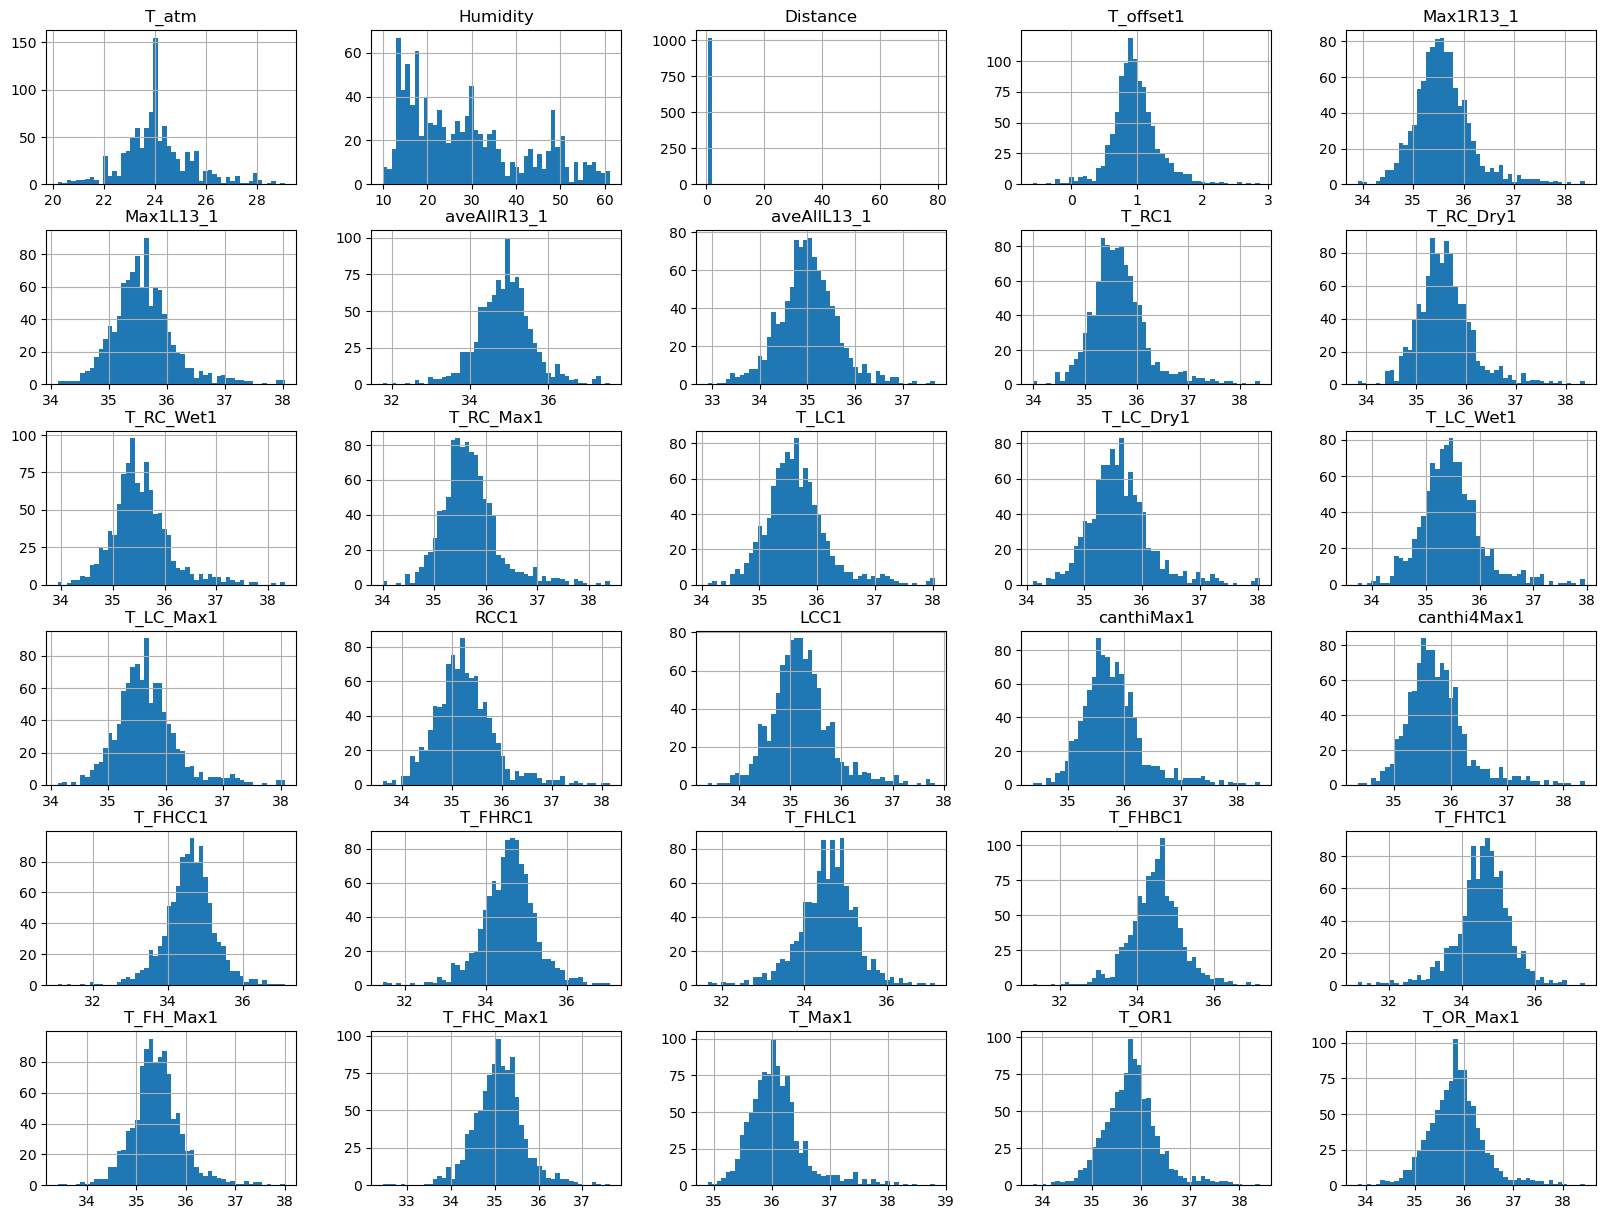

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

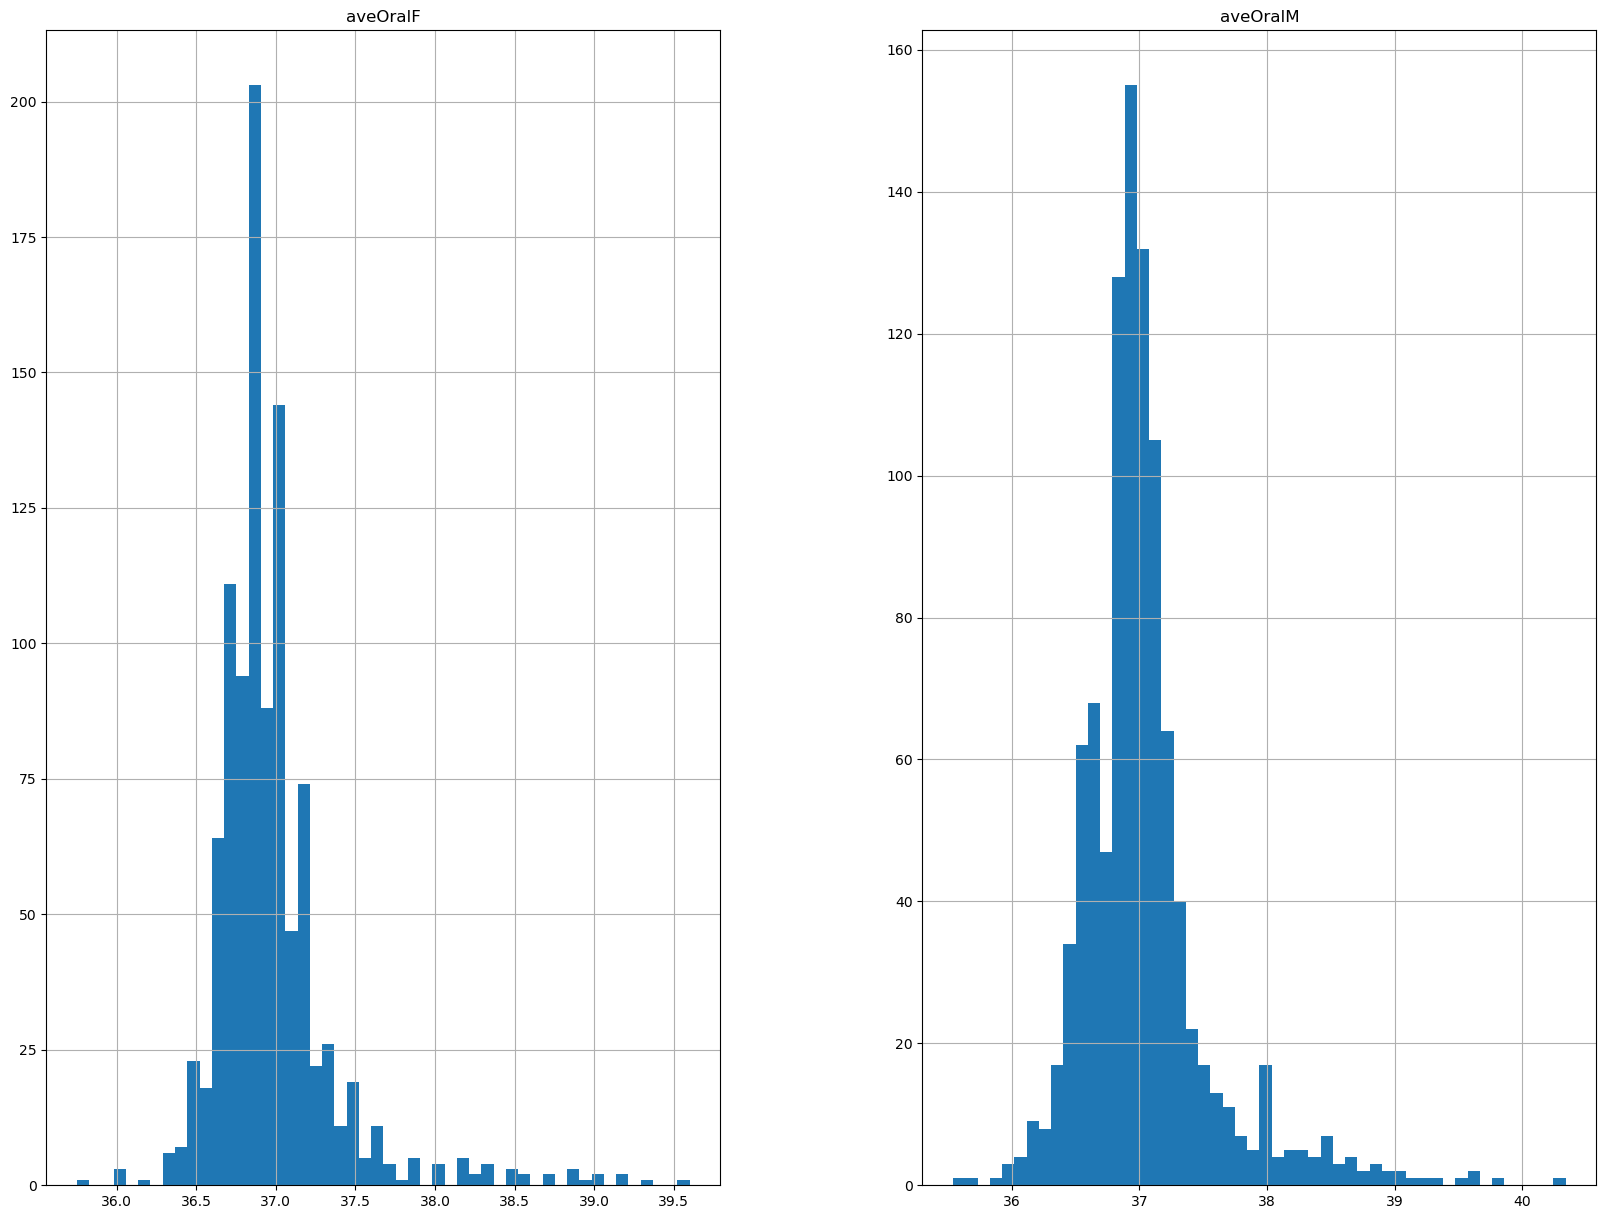

In [1076]:

%matplotlib inline
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(20,15))
plt.show()

# Setup

In [1077]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_history_regression(history):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]

    epochs = range(1, len(loss) + 1)

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, loss, blue_dots, label="Training loss")
    plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    rmse = history_dict["root_mean_squared_error"]
    val_rmse = history_dict["val_root_mean_squared_error"]

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, rmse, blue_dots, label="Training RMSE")
    plt.plot(epochs, val_rmse, solid_blue_line, label="Validation RMSE")
    plt.title("Training and validation RMSE")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend()

    plt.show()

def plot_history_classification(history):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]

    epochs = range(1, len(loss) + 1)

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, loss, blue_dots, label="Training loss")
    plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    accuracy = history_dict["accuracy"]
    val_accuracy = history_dict["accuracy"]

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, accuracy, blue_dots, label="Training accuracy")
    plt.plot(epochs, val_accuracy, solid_blue_line, label="Validation accuracy")
    plt.title("Training and validation recall")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

# Handling Text and Categorical (Nominal) Columns (Attributes/ Features)

In [12]:
# Show the values of the object categorical features in the dataset
for column in X.select_dtypes(include=['object']):
    print(X[column].value_counts())

Gender
Female    606
Male      414
Name: count, dtype: int64
Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64
Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64


In [13]:
# one-hot encoding on Categorial features
# Concatenate the one hot encoding result to their repective results on the columns (Turn everything into numbers)
from sklearn.preprocessing import OneHotEncoder

for column in X.select_dtypes(include=['object']):
    float_encoder = OneHotEncoder()
    X_encoded = float_encoder.fit_transform(X[[column]])
    X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns = float_encoder.get_feature_names_out([column]))
    X = pd.concat([X.drop(columns=[column]), X_encoded_df], axis =1)
X

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1016,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1018,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Find the incomplete rows and subtitute them with the median

In [14]:
incomplete_rows = X[X.isnull().any(axis=1)].head()
incomplete_rows

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
902,23.9,15.3,NaN,0.8100,35.735,35.4150,35.0525,34.6275,35.7000,35.7000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
903,23.9,15.3,NaN,0.7775,35.620,35.6275,34.3650,33.8125,35.6675,35.5975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# compute the median of Distance variable 
median = X["Distance"].median()
print('median is: ', median)

median is:  0.62


In [16]:
incomplete_rows["Distance"].fillna(median, inplace=True) # option 3; note median filledin the nulls on total_bedrooms column
incomplete_rows

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
902,23.9,15.3,0.62,0.8100,35.735,35.4150,35.0525,34.6275,35.7000,35.7000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
903,23.9,15.3,0.62,0.7775,35.620,35.6275,34.3650,33.8125,35.6675,35.5975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
X['Distance'] = X['Distance'].fillna(median)
X[X['Distance'].isna()==1]

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White


In [18]:
X

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1016,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1018,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Create Train and Test set

In [19]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [20]:
X_train_full.dtypes

T_atm                                          float64
Humidity                                       float64
Distance                                       float64
T_offset1                                      float64
Max1R13_1                                      float64
Max1L13_1                                      float64
aveAllR13_1                                    float64
aveAllL13_1                                    float64
T_RC1                                          float64
T_RC_Dry1                                      float64
T_RC_Wet1                                      float64
T_RC_Max1                                      float64
T_LC1                                          float64
T_LC_Dry1                                      float64
T_LC_Wet1                                      float64
T_LC_Max1                                      float64
RCC1                                           float64
LCC1                                           float64
canthiMax1

In [21]:
X_train_full

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
432,25.1,38.3,0.60,1.642500,35.865000,36.3050,35.345000,35.8450,35.9150,35.8450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1014,25.7,50.8,0.60,1.177500,36.112500,36.1150,35.120000,35.3750,36.1100,36.0875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
507,28.2,48.4,0.60,1.737500,36.112500,36.1575,35.780000,35.5850,36.1225,36.1175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,23.0,28.3,0.80,0.887500,34.887500,34.9575,34.152500,34.2650,34.9725,34.9725,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
204,22.7,18.4,0.75,0.775000,34.362500,34.8425,33.352500,34.3250,34.7875,34.5400,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,23.3,13.8,0.70,0.636667,35.393333,35.0700,34.056667,34.2000,35.3800,35.3600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270,22.3,35.9,0.70,0.670000,36.195000,36.0125,35.672500,35.6025,36.2550,36.1675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,24.2,18.3,0.62,1.005000,35.605000,35.7150,34.850000,34.9975,35.5725,35.5725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
435,27.4,36.2,0.65,1.452500,35.787500,36.0225,35.557500,35.7325,35.7925,35.7675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
y_train_full

,aveOralF,aveOralM
432,37.05,36.89
1014,36.95,36.99
507,36.90,36.79
33,37.30,37.39
204,36.95,36.59
...,...,...
106,36.90,36.69
270,36.70,37.09
860,37.00,36.99
435,36.85,37.04


In [23]:
X_train

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
225,22.7,14.0,0.73,0.7550,35.530000,35.640000,34.677500,35.0100,35.797500,35.672500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,23.4,27.3,0.80,0.8150,36.185000,35.952500,35.540000,35.4200,36.150000,36.150000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,22.8,57.2,0.67,-0.0700,34.002500,34.375000,32.675000,33.5225,33.985000,33.980000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
339,23.3,44.1,0.63,0.7625,35.732500,36.030000,35.012500,35.1775,35.805000,35.660000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
686,24.2,14.5,0.60,0.9000,36.593333,36.163333,35.696667,35.2900,36.863333,36.606667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,23.5,17.6,0.56,0.9550,35.237500,35.087500,34.322500,34.2850,35.317500,35.257500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,21.3,55.5,0.76,0.8675,34.987500,34.917500,34.640000,34.5825,34.965000,34.965000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
324,25.0,28.9,0.64,0.7525,35.287500,35.617500,34.842500,35.0175,35.632500,35.312500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53,23.7,33.7,0.60,0.5775,35.027500,35.237500,34.610000,34.8525,35.002500,34.970000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
y_train

,aveOralF,aveOralM
225,36.85,36.54
28,36.95,37.14
166,36.55,36.44
339,36.75,36.84
686,37.40,38.29
...,...,...
591,37.35,36.94
394,36.85,36.79
324,36.80,37.39
53,36.80,36.54


In [127]:
X_test

array([[ 0.009792  ,  0.09636508, -0.02753728, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.52096064, -1.03280558, -0.02753728, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [ 0.99547545, -0.05319394, -0.04282392, ..., -0.26273532,
        -0.23088704,  1.04097856],
       ...,
       [-0.44513883, -1.27210002, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.90006966,  0.45530675, -0.04282392, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [-0.67260424, -0.8757686 , -0.05811055, ...,  3.80611173,
        -0.23088704, -0.96063458]])

In [128]:
y_test

,aveOralF,aveOralM
523,36.90,37.09
602,36.75,36.74
526,36.75,36.79
31,36.65,36.49
616,36.80,36.79
...,...,...
817,36.65,36.59
370,37.05,36.89
921,36.85,36.99
249,36.50,36.44


In [129]:
X_valid

array([[-0.14185161, -0.65143006, -0.05811055, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [ 0.76801004,  0.34313748, -0.04282392, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.29349522,  1.34518297, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       ...,
       [-0.21767342, -0.39717971, -0.01225065, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [ 0.84383185,  1.46483019, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [ 0.0856138 , -0.81594499, -0.04282392, ..., -0.26273532,
         4.33112234, -0.96063458]])

In [130]:
y_valid

,aveOralF,aveOralM
617,36.55,36.44
416,36.90,36.64
458,36.90,36.89
367,37.20,37.54
50,36.85,36.99
...,...,...
580,37.10,36.89
130,37.45,37.39
487,38.70,38.94
764,36.90,36.84


## Separate the 2 y variables

In [297]:
y_aveOralF = y['aveOralF']
y_aveOralF

0       36.85
1       37.00
2       37.20
3       36.85
4       36.80
        ...  
1015    36.95
1016    37.25
1017    37.35
1018    37.15
1019    37.05
Name: aveOralF, Length: 1020, dtype: float64

In [298]:
y_aveOralM = y['aveOralM']
y_aveOralM

0       36.59
1       37.19
2       37.34
3       37.09
4       37.04
        ...  
1015    36.99
1016    37.19
1017    37.59
1018    37.29
1019    37.19
Name: aveOralM, Length: 1020, dtype: float64

In [299]:
# Split the data 80% training 20% testing for aveOralF
X_aveOralF_train, X_aveOralF_test, y_aveOralF_train, y_aveOralF_test = train_test_split(X, y_aveOralF, test_size=0.2, random_state=42)

# Split the data 80% training 20% testing for aveOralM
X_aveOralM_train, X_aveOralM_test, y_aveOralM_train, y_aveOralM_test = train_test_split(X, y_aveOralM, test_size=0.2, random_state=42)

## Look at the data

In [300]:
X_aveOralF_train

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
743,23.8,24.4,0.65,1.270000,35.743333,35.723333,35.103333,35.183333,35.756667,35.643333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
137,24.1,25.9,0.79,0.965000,35.715000,35.400000,35.247500,34.962500,35.722500,35.722500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
799,28.6,49.2,0.60,2.535000,38.082500,38.042500,37.575000,37.680000,38.112500,38.065000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
933,23.9,19.3,0.64,0.905000,35.975000,36.297500,35.232500,35.505000,36.065000,36.060000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
822,24.5,23.1,0.60,1.110000,35.535000,35.212500,34.747500,34.847500,35.515000,35.502500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,23.3,13.8,0.70,0.636667,35.393333,35.070000,34.056667,34.200000,35.380000,35.360000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270,22.3,35.9,0.70,0.670000,36.195000,36.012500,35.672500,35.602500,36.255000,36.167500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,24.2,18.3,0.62,1.005000,35.605000,35.715000,34.850000,34.997500,35.572500,35.572500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
435,27.4,36.2,0.65,1.452500,35.787500,36.022500,35.557500,35.732500,35.792500,35.767500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [301]:
X_aveOralF_test

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
523,24.1,30.2,0.70,0.807500,35.277500,35.400000,34.655000,34.580000,35.455000,35.230000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
602,23.4,15.1,0.70,0.972500,35.072500,34.757500,34.432500,34.065000,35.145000,34.995000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
526,25.4,28.2,0.65,1.150000,35.337500,35.837500,34.505000,34.997500,35.502500,35.287500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,22.8,33.0,0.80,0.675000,35.050000,34.570000,34.565000,34.077500,35.037500,35.022500,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
616,23.8,20.6,0.60,0.763333,35.213333,35.463333,34.660000,35.153333,35.376667,35.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,25.6,50.9,0.60,1.010000,35.515000,35.820000,34.667500,35.317500,35.585000,35.550000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
449,24.0,50.8,0.60,1.000000,35.655000,35.600000,34.977500,35.235000,35.752500,35.562500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
783,25.9,48.8,0.60,1.522500,35.705000,35.662500,35.207500,35.085000,35.687500,35.680000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
593,23.5,17.6,0.63,0.990000,35.886667,35.580000,35.323333,35.186667,35.833333,35.833333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [302]:
y_aveOralM_train

743    36.94
137    36.84
799    39.54
933    37.94
822    36.89
       ...  
106    36.69
270    37.09
860    36.99
435    37.04
102    37.34
Name: aveOralM, Length: 816, dtype: float64

In [303]:
y_aveOralM_test

523    37.09
602    36.74
526    36.79
31     36.49
616    36.79
       ...  
516    36.74
449    36.84
783    37.09
593    36.79
909    36.99
Name: aveOralM, Length: 204, dtype: float64

# Scaled Data

In [180]:
from sklearn.preprocessing import StandardScaler
# Scale X 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
# Scale y
y_train_scaled = scaler.fit_transform(y_train)
y_valid_scaled = scaler.transform(y_valid)
y_test_scaled = scaler.transform(y_test)


In [181]:
X_train_scaled

array([[-1.05171327e+00, -1.11506304e+00, -1.83653032e-02, ...,
         3.80611173e+00, -2.30887036e-01, -9.60634578e-01],
       [-5.20960636e-01, -1.20495507e-01,  3.03598418e-03, ...,
         3.80611173e+00, -2.30887036e-01, -9.60634578e-01],
       [-9.75891463e-01,  2.11541196e+00, -3.67092639e-02, ...,
        -2.62735325e-01, -2.30887036e-01, -9.60634578e-01],
       ...,
       [ 6.92188236e-01, -8.48284190e-04, -4.58812442e-02, ...,
        -2.62735325e-01, -2.30887036e-01, -9.60634578e-01],
       [-2.93495222e-01,  3.58093383e-01, -5.81105513e-02, ...,
        -2.62735325e-01, -2.30887036e-01,  1.04097856e+00],
       [ 1.37458448e+00, -2.92488389e-01, -5.81105513e-02, ...,
        -2.62735325e-01, -2.30887036e-01,  1.04097856e+00]])

In [182]:
X_valid_scaled

array([[-0.14185161, -0.65143006, -0.05811055, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [ 0.76801004,  0.34313748, -0.04282392, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.29349522,  1.34518297, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       ...,
       [-0.21767342, -0.39717971, -0.01225065, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [ 0.84383185,  1.46483019, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [ 0.0856138 , -0.81594499, -0.04282392, ..., -0.26273532,
         4.33112234, -0.96063458]])

In [183]:
X_test_scaled

array([[ 0.009792  ,  0.09636508, -0.02753728, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.52096064, -1.03280558, -0.02753728, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [ 0.99547545, -0.05319394, -0.04282392, ..., -0.26273532,
        -0.23088704,  1.04097856],
       ...,
       [-0.44513883, -1.27210002, -0.05811055, ..., -0.26273532,
        -0.23088704, -0.96063458],
       [-0.90006966,  0.45530675, -0.04282392, ..., -0.26273532,
        -0.23088704,  1.04097856],
       [-0.67260424, -0.8757686 , -0.05811055, ...,  3.80611173,
        -0.23088704, -0.96063458]])

# Methodology/Experimentation

# Regression

## Regression MLP

### aveOralF

In [553]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)


Epoch 1/30
21/21 [==============================] - 2s 38ms/step - loss: 147.2299 - root_mean_squared_error: 12.1338 - val_loss: 13.3479 - val_root_mean_squared_error: 3.6535
Epoch 2/30
21/21 [==============================] - 0s 10ms/step - loss: 5.9190 - root_mean_squared_error: 2.4329 - val_loss: 1.5820 - val_root_mean_squared_error: 1.2578
Epoch 3/30
21/21 [==============================] - 0s 10ms/step - loss: 2.0890 - root_mean_squared_error: 1.4453 - val_loss: 1.4804 - val_root_mean_squared_error: 1.2167
Epoch 4/30
21/21 [==============================] - 0s 9ms/step - loss: 1.6130 - root_mean_squared_error: 1.2700 - val_loss: 1.4030 - val_root_mean_squared_error: 1.1845
Epoch 5/30
21/21 [==============================] - 0s 10ms/step - loss: 1.3441 - root_mean_squared_error: 1.1594 - val_loss: 1.1731 - val_root_mean_squared_error: 1.0831
Epoch 6/30
21/21 [==============================] - 0s 10ms/step - loss: 1.1623 - root_mean_squared_error: 1.0781 - val_loss: 1.0184 - val_roo

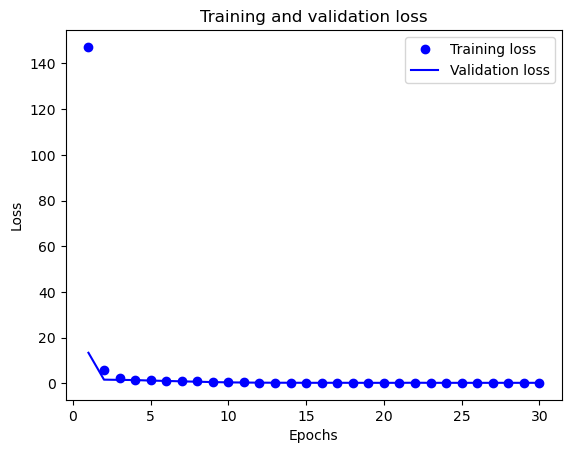

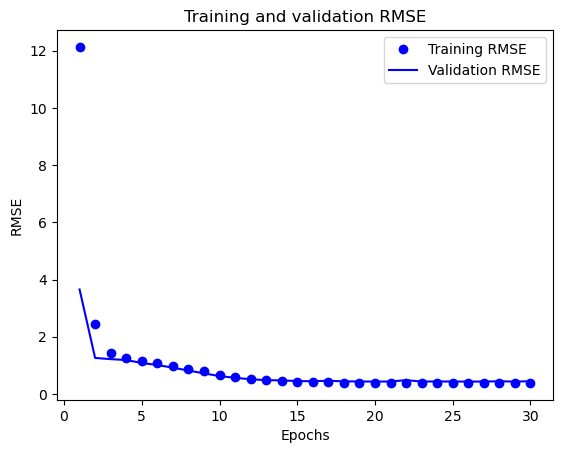

In [554]:

aveOralF_model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(30, activation="relu"),
keras.layers.Dense(1)
]) 

# Compile the model
# Define checkpoint callback 
aveOralF_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-3),metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                validation_split = 0.2,
                callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves

plot_history_regression(history)
    

In [555]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test,y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 3ms/step - loss: 0.1584 - root_mean_squared_error: 0.3980
RMSE 0.3980003595352173


### aveOralM

Epoch 1/30
21/21 [==============================] - 2s 32ms/step - loss: 23.0963 - root_mean_squared_error: 4.8059 - val_loss: 9.3125 - val_root_mean_squared_error: 3.0516
Epoch 2/30
21/21 [==============================] - 0s 10ms/step - loss: 2.6963 - root_mean_squared_error: 1.6421 - val_loss: 1.0647 - val_root_mean_squared_error: 1.0318
Epoch 3/30
21/21 [==============================] - 0s 10ms/step - loss: 0.5113 - root_mean_squared_error: 0.7151 - val_loss: 0.3847 - val_root_mean_squared_error: 0.6202
Epoch 4/30
21/21 [==============================] - 0s 10ms/step - loss: 0.3479 - root_mean_squared_error: 0.5898 - val_loss: 0.2593 - val_root_mean_squared_error: 0.5093
Epoch 5/30
21/21 [==============================] - 0s 10ms/step - loss: 0.3039 - root_mean_squared_error: 0.5513 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4945
Epoch 6/30
21/21 [==============================] - 0s 7ms/step - loss: 0.2789 - root_mean_squared_error: 0.5281 - val_loss: 0.2532 - val_root_m

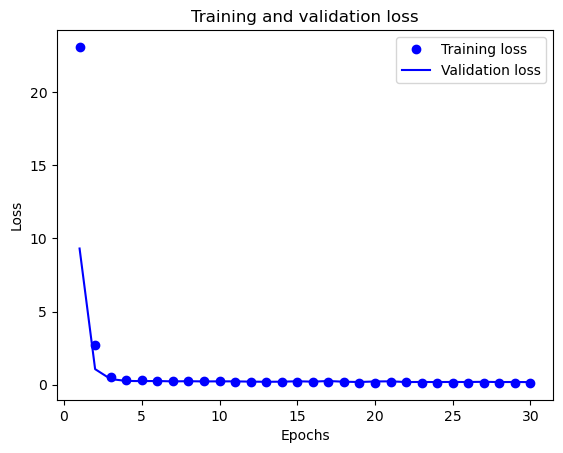

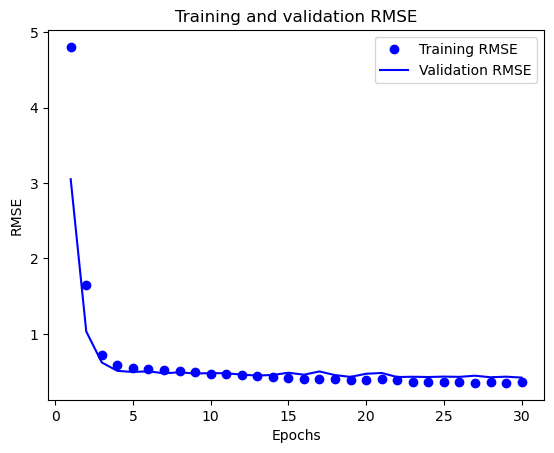

In [509]:
np.random.seed(42)
tf.random.set_seed(42)
aveOralM_model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(30, activation="relu"),
keras.layers.Dense(1)
]) 

# Compile the model
# Define checkpoint callback 
aveOralM_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-3),metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                validation_split = 0.2,
                callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves

plot_history_regression(history)

In [510]:
test_loss,test_root_mean_squared_error = model.evaluate(X_aveOralM_test,y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 4ms/step - loss: 0.0901 - root_mean_squared_error: 0.3001
RMSE 0.30010876059532166


# Elastic net

### aveOralF

In [313]:
# Regularisation hyperparameters for Elastic net are as seen in the lecture:
# alpha - the strength of regularisation, and l1_ratio (r in the slides)
# which controls the mixture of Lasso (L1 regularisation) and Ridge (L2 regularisation) 
# as part of Elastic net. 
# E.g. l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.23, random_state=42)
elastic_net.fit(X_aveOralF_train, y_aveOralF_train)
elastic_net.predict(X_aveOralF_test)

array([36.98073753, 36.72706288, 36.72614898, 36.82922634, 36.87296039,
       37.00249776, 37.40140975, 36.85507071, 36.9303085 , 36.92659759,
       37.1441138 , 36.74523761, 37.22333831, 36.95003339, 36.9030287 ,
       36.88867206, 37.12323779, 37.19052092, 37.27318262, 37.00371106,
       37.01094598, 36.75193832, 37.07626144, 36.94632337, 37.0139219 ,
       36.92091782, 37.2352838 , 36.77268581, 36.9869218 , 36.66352115,
       37.06185142, 36.66444843, 37.13479296, 37.48680421, 37.13638901,
       37.08072826, 36.75664747, 36.96821874, 36.76621836, 37.00549977,
       37.09548913, 36.62198399, 37.16383731, 36.92573143, 36.97099852,
       37.07678094, 37.35288992, 37.02710218, 37.14215487, 36.93681691,
       36.56107058, 37.85762501, 37.33267713, 37.29327098, 36.89431207,
       36.87745021, 37.03218964, 37.10444579, 36.93314422, 36.85685477,
       37.40473495, 36.58987124, 37.01327938, 36.91320229, 36.9180085 ,
       37.09684739, 37.06072587, 37.29297337, 37.03264717, 36.86

In [314]:
# let's see what rmse error the Elastic regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralF_pred = elastic_net.predict(X_aveOralF_test)
Elastic_mse = mean_squared_error(y_aveOralF_test,aveOralF_pred )
Elastic_rmse = np.sqrt(Elastic_mse)
print("RMSE Eval",Elastic_rmse)
print("MSE Eval",Elastic_mse)

RMSE Eval 0.2340493725743007
MSE Eval 0.054779108802423815


### aveOralM

In [325]:
# Regularisation hyperparameters for Elastic net are as seen in the lecture:
# alpha - the strength of regularisation, and l1_ratio (r in the slides)
# which controls the mixture of Lasso (L1 regularisation) and Ridge (L2 regularisation) 
# as part of Elastic net. 
# E.g. l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.02, l1_ratio=0.12, random_state=42)
elastic_net.fit(X_aveOralM_train, y_aveOralM_train)
elastic_net.predict(X_aveOralM_test)

array([37.01474093, 36.44993463, 36.85453265, 36.66737381, 36.79689355,
       37.09158818, 37.81257424, 36.67745319, 36.88172747, 36.89175012,
       37.20722163, 36.61107456, 37.40395051, 36.92033395, 36.89481365,
       36.9613426 , 37.30802593, 37.29880737, 37.75269326, 37.03288377,
       36.93969419, 36.51705796, 37.11375054, 37.04239279, 36.99201773,
       36.82107916, 37.51637509, 36.64438355, 36.96501664, 36.48470821,
       37.26947223, 36.49274387, 37.18567334, 37.89089525, 37.3499074 ,
       37.23408967, 36.60154417, 37.06257208, 36.72710273, 36.93952322,
       37.16199544, 36.48633171, 37.33162447, 36.90062162, 36.98880625,
       37.16327093, 37.83854693, 37.01083044, 37.22987322, 36.88189765,
       36.31008804, 38.65467892, 37.68977202, 37.67246762, 36.92011681,
       36.75825014, 37.12690724, 37.221924  , 36.84188879, 36.72476359,
       37.90935102, 36.52565099, 37.13623555, 36.93613844, 36.8874914 ,
       37.1624951 , 37.24157651, 37.63962214, 37.14497352, 36.85

In [326]:
# let's see what rmse error the Elastic regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralM_pred = elastic_net.predict(X_aveOralM_test)
Elastic_mse = mean_squared_error(y_aveOralM_test,aveOralM_pred )
Elastic_rmse = np.sqrt(Elastic_mse)
print("RMSE Eval",Elastic_rmse)
print("MSE Eval",Elastic_mse)

RMSE Eval 0.2269915587124626
MSE Eval 0.05152516772671335


## Ridge Regression

### aveOralF

In [349]:
# Regularisation hyperparameter for Ridge is as seen in the lecture:
# alpha - the strength of regularisation.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.85, solver="cholesky", random_state=42)
ridge_reg.fit(X_aveOralF_train, y_aveOralF_train)
ridge_reg.predict(X_aveOralF_test)

array([37.13670473, 36.62149552, 36.69916956, 36.98097694, 36.74567067,
       37.06080135, 37.43959054, 36.75036732, 36.91960296, 36.83215387,
       37.10335835, 36.69323067, 37.35606892, 36.97624849, 36.82989413,
       37.02441432, 37.18473273, 37.27149395, 37.51557561, 36.8984089 ,
       36.911737  , 36.66138335, 36.9810996 , 36.99326657, 36.86421057,
       36.85551895, 37.43594188, 36.84718797, 36.97658559, 36.55436731,
       37.17768415, 36.59017918, 36.99531479, 37.56491262, 37.19774201,
       37.22702646, 36.66846625, 37.12486311, 36.63978875, 36.87986928,
       37.02470361, 36.78893637, 37.16682638, 37.01975557, 36.87819039,
       37.02914013, 37.48033874, 36.8760312 , 37.30265784, 36.94817144,
       36.41963332, 38.17257816, 37.36800596, 37.30599423, 36.75970497,
       36.81552778, 37.0501469 , 37.08369104, 36.84320512, 36.77868421,
       37.63686999, 36.66398639, 37.17097199, 36.91033133, 36.88864192,
       37.11094771, 37.19126169, 37.30874485, 37.02468358, 36.85

In [350]:
# let's see what rmse error the Ridge regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralF_pred = ridge_reg.predict(X_aveOralF_test)
Ridge_mse = mean_squared_error(y_aveOralF_test,aveOralF_pred )
Ridge_rmse = np.sqrt(Ridge_mse)
print("RMSE Eval",Ridge_rmse)
print("MSE Eval",Ridge_mse)

RMSE Eval 0.23755306021454384
MSE Eval 0.05643145641729469


### aveOralM

In [376]:
# Regularisation hyperparameter for Ridge is as seen in the lecture:
# alpha - the strength of regularisation.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, solver="cholesky", random_state=42)
ridge_reg.fit(X_aveOralM_train, y_aveOralM_train)
ridge_reg.predict(X_aveOralM_test)

array([37.1091063 , 36.41702332, 36.86288056, 36.70255186, 36.75341152,
       37.07846195, 37.83359937, 36.63436542, 36.84141883, 36.87306246,
       37.17484717, 36.6277589 , 37.44415269, 36.93589248, 36.87300895,
       37.00408776, 37.28222189, 37.28872965, 37.92707306, 37.02575945,
       36.88659417, 36.48987035, 37.07632006, 37.02548001, 36.96485355,
       36.80824474, 37.57281944, 36.65909938, 36.9580017 , 36.52005971,
       37.3096399 , 36.45026858, 37.16147895, 37.88132431, 37.35144721,
       37.29999456, 36.58583389, 37.09622482, 36.70104596, 36.89071898,
       37.12423206, 36.51706024, 37.35480265, 36.95864594, 36.95745864,
       37.12144039, 37.90588934, 36.96536101, 37.29726973, 36.85742665,
       36.30012873, 38.71747464, 37.69494497, 37.65866054, 36.87301281,
       36.70804437, 37.12059953, 37.20158693, 36.81992414, 36.71238311,
       37.97321951, 36.56717412, 37.16076593, 36.9521617 , 36.87415402,
       37.1402146 , 37.24000125, 37.63602112, 37.14015556, 36.85

In [377]:
# let's see what rmse error the Ridge regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralM_pred = ridge_reg.predict(X_aveOralM_test)
Ridge_mse = mean_squared_error(y_aveOralM_test,aveOralM_pred )
Ridge_rmse = np.sqrt(Ridge_mse)
print("RMSE Eval",Ridge_rmse)
print("MSE Eval",Ridge_mse)

RMSE Eval 0.22773835274613607
MSE Eval 0.0518647573115235


## Lasso Regression

### aveOralF

In [384]:
# Regularisation hyperparameter for Lasso is as seen in the lecture:
# alpha - the strength of regularisation.

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_aveOralF_train, y_aveOralF_train)
lasso_reg.predict(X_aveOralF_test)

array([37.06117181, 36.64099175, 36.75656333, 36.83739208, 36.77613866,
       37.08393913, 37.453669  , 36.75753248, 36.89548667, 36.81457514,
       37.10844576, 36.67863066, 37.3270257 , 36.96042265, 36.84436882,
       37.00308357, 37.21069509, 37.25281216, 37.50359611, 36.93152835,
       36.94320261, 36.65359228, 37.00627036, 36.99872646, 36.89444073,
       36.85332572, 37.42398208, 36.82484822, 36.97773606, 36.55317784,
       37.16879331, 36.56161921, 37.00377243, 37.58650486, 37.23612847,
       37.14907261, 36.66235201, 37.0984182 , 36.66374356, 36.91285882,
       37.03140442, 36.78569717, 37.1431629 , 37.01256152, 36.89076029,
       37.01712283, 37.49130709, 36.91483747, 37.28464878, 36.94679248,
       36.40778596, 38.16031883, 37.3856955 , 37.35473824, 36.79422231,
       36.85111907, 37.05550457, 37.10109426, 36.83485438, 36.77182809,
       37.59280591, 36.66044896, 37.1548933 , 36.9042607 , 36.91011794,
       37.09744993, 37.19541743, 37.28816225, 37.03835993, 36.84

In [385]:
# let's see what rmse error the lasso regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralF_pred = lasso_reg.predict(X_aveOralF_test)
Lasso_mse = mean_squared_error(y_aveOralF_test,aveOralF_pred )
Lasso_rmse = np.sqrt(Lasso_mse)
print("RMSE Eval",Lasso_rmse)
print("MSE Eval",Lasso_mse)

RMSE Eval 0.23513312993218105
MSE Eval 0.05528758879170394


### aveOralM

In [1059]:
# Regularisation hyperparameter for Lasso is as seen in the lecture:
# alpha - the strength of regularisation.

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_aveOralM_train, y_aveOralM_train)
lasso_reg.predict(X_aveOralM_test)

array([37.05189144, 36.43170395, 37.03042251, 36.68971506, 36.74859513,
       37.04352181, 37.82591561, 36.63431226, 36.8162016 , 36.84613018,
       37.18535542, 36.58882686, 37.4476386 , 36.94186889, 36.8881292 ,
       36.99184716, 37.3259868 , 37.32366913, 37.8606952 , 37.00702143,
       36.904535  , 36.46756128, 37.10778748, 37.01717535, 36.96151485,
       36.83013783, 37.57424774, 36.651969  , 36.96099827, 36.50516645,
       37.30939869, 36.47860431, 37.1311136 , 37.90748162, 37.37119707,
       37.24267715, 36.5713544 , 37.07939033, 36.70598753, 36.92541853,
       37.1816722 , 36.55318573, 37.37692539, 36.96959371, 36.93436618,
       37.11560884, 37.98073639, 36.96268676, 37.38059276, 36.87863137,
       36.28216537, 38.75236573, 37.70674959, 37.67365827, 36.92382346,
       36.70553175, 37.14242837, 37.22437143, 36.82567734, 36.69490607,
       37.96454792, 36.63119769, 37.17216853, 36.95726448, 36.87888593,
       37.11800607, 37.20728775, 37.65249624, 37.12798872, 36.84

In [1060]:
# let's see what rmse error the lasso regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralM_pred = lasso_reg.predict(X_aveOralM_test)
Lasso_mse = mean_squared_error(y_aveOralM_test,aveOralM_pred )
Lasso_rmse = np.sqrt(Lasso_mse)
print("RMSE Eval",Lasso_rmse)
print("MSE Eval",Lasso_mse)

RMSE Eval 0.22810331592216396
MSE Eval 0.05203112273468653


## Early Stopping

### aveOralF

In [1069]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.01, 
                       max_iter=100, early_stopping=True,  
                       n_iter_no_change=5, tol=1e-3, random_state=42)
sgd_reg.fit(X_aveOralF_train, y_aveOralF_train)
sgd_reg.predict(X_aveOralF_test)

array([1.97367520e+13, 2.37221074e+13, 1.99225099e+13, 1.85870909e+13,
       2.24222772e+13, 2.42134134e+13, 1.47606986e+13, 2.36471717e+13,
       2.16773804e+13, 1.41203147e+13, 1.58997538e+13, 2.15327451e+13,
       2.36225451e+13, 2.30970610e+13, 2.34960084e+13, 2.37797135e+13,
       2.00498996e+13, 1.98071256e+13, 2.51270540e+13, 2.20472038e+13,
       1.91689338e+13, 2.37237301e+13, 2.12234594e+13, 1.35535268e+13,
       1.95126279e+13, 2.44798411e+13, 1.71005483e+13, 2.45798067e+13,
       2.45961035e+13, 2.23871184e+13, 2.22068401e+13, 2.43035209e+13,
       1.97038103e+13, 2.01237982e+13, 1.45131383e+13, 2.18315916e+13,
       2.43156340e+13, 2.44337643e+13, 1.25828192e+13, 2.39829570e+13,
       2.41742126e+13, 1.89817067e+13, 2.45243661e+13, 1.85215997e+13,
       1.81569503e+13, 2.32825428e+13, 2.24269184e+13, 1.16403153e+13,
       1.83324761e+13, 1.84007560e+13, 2.34474741e+13, 1.68709028e+13,
       1.90675540e+13, 2.04078432e+13, 2.22141102e+13, 2.40155707e+13,
      

In [1065]:
# let's see what rmse error the Early stopping regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralF_pred = sgd_reg.predict(X_aveOralF_test)
Sgd_mse = mean_squared_error(y_aveOralF_test,aveOralF_pred )
Sgd_rmse = np.sqrt(Sgd_mse)
print("RMSE Eval",Sgd_rmse)
print("MSE Eval",Sgd_mse)

RMSE Eval 14637645849935.283
MSE Eval 2.142606760281276e+26


### aveOralM

In [1070]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.01, 
                       max_iter=100, early_stopping=True,  
                       n_iter_no_change=5, tol=1e-3, random_state=42)
sgd_reg.fit(X_aveOralM_train, y_aveOralM_train)
sgd_reg.predict(X_aveOralM_test)

array([-2.02785179e+13, -1.98649250e+13, -2.04415929e+13, -2.01560903e+13,
       -2.04161185e+13, -2.02754794e+13, -2.10548086e+13, -2.02052263e+13,
       -2.02535514e+13, -2.04582519e+13, -2.08945837e+13, -2.00332803e+13,
       -2.04311667e+13, -1.98201756e+13, -2.04259031e+13, -2.00936249e+13,
       -2.02160593e+13, -2.08100424e+13, -1.99551512e+13, -2.10612064e+13,
       -2.10263014e+13, -2.01978071e+13, -2.03372717e+13, -2.02564985e+13,
       -2.07047114e+13, -2.03770056e+13, -1.95962693e+13, -1.98830939e+13,
       -1.99729319e+13, -2.00834804e+13, -2.03092697e+13, -2.01163995e+13,
       -2.15127276e+13, -2.07942929e+13, -2.07592638e+13, -2.00827280e+13,
       -1.95855537e+13, -1.99396701e+13, -2.03777341e+13, -2.05869499e+13,
       -2.07553040e+13, -1.94114263e+13, -2.02214808e+13, -2.01288126e+13,
       -2.09836312e+13, -2.03129115e+13, -2.10414171e+13, -2.08444155e+13,
       -2.02334516e+13, -2.05918040e+13, -2.03071111e+13, -2.13030639e+13,
       -2.07046418e+13, -

In [1071]:
# let's see what rmse error the Early stopping regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralM_pred = sgd_reg.predict(X_aveOralM_test)
Sgd_mse = mean_squared_error(y_aveOralM_test,aveOralM_pred )
Sgd_rmse = np.sqrt(Sgd_mse)
print("RMSE Eval",Sgd_rmse)
print("MSE Eval",Sgd_mse)

RMSE Eval 20411146058816.08
MSE Eval 4.1661488343432316e+26


## Linear Regression

### aveOralF

In [1072]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_aveOralF_train, y_aveOralF_train)
lin_reg.predict(X_aveOralF_test)

array([37.1483345 , 36.6171574 , 36.69412956, 37.05887974, 36.75286211,
       37.06220412, 37.45077861, 36.75740617, 36.92700586, 36.82623221,
       37.11270013, 36.70208062, 37.359775  , 36.97399716, 36.82110002,
       37.05977994, 37.19758021, 37.28618691, 37.51771239, 36.88674885,
       36.91452908, 36.66548839, 36.98509483, 36.98724118, 36.86263583,
       36.86181793, 37.43882925, 36.8230438 , 36.98136663, 36.55512344,
       37.18796487, 36.59811405, 36.99463035, 37.56703274, 37.19117624,
       37.21189535, 36.66521351, 37.12133316, 36.63291823, 36.86113867,
       37.02852952, 36.78340382, 37.15616741, 37.0322779 , 36.88442639,
       37.02138693, 37.47103302, 36.88298497, 37.30325524, 36.93519535,
       36.4260769 , 38.18013748, 37.36455278, 37.3073356 , 36.75447147,
       36.81920261, 37.03963026, 37.08463836, 36.85111413, 36.77650601,
       37.63134365, 36.66598028, 37.18082779, 36.92334669, 36.87386088,
       37.09157339, 37.19663422, 37.30890491, 37.02644568, 36.84

In [1073]:
# let's see what rmse error the Linear regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralF_pred = lin_reg.predict(X_aveOralF_test)
Lin_mse = mean_squared_error(y_aveOralF_test,aveOralF_pred )
Lin_rmse = np.sqrt(Lin_mse)
print("RMSE Eval",Lin_rmse)
print("MSE Eval",Lin_mse)

RMSE Eval 0.2392637681509358
MSE Eval 0.05724715074978476


### aveOralM

In [1074]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_aveOralM_train, y_aveOralM_train)
lin_reg.predict(X_aveOralM_test)

array([37.21590697, 36.36314098, 36.99657448, 36.91053814, 36.70429391,
       37.01094429, 37.8573549 , 36.62523486, 36.76281478, 36.79637003,
       37.18349335, 36.65595055, 37.4339953 , 36.92447339, 36.87632755,
       37.05397091, 37.3062911 , 37.34819471, 37.91298292, 37.02924033,
       36.88175571, 36.49005324, 37.10351374, 36.99269696, 36.91013864,
       36.82331478, 37.58318224, 36.66602255, 36.94189435, 36.55009031,
       37.33161115, 36.46518383, 37.12513621, 37.87539529, 37.30223912,
       37.38191762, 36.58430671, 37.09160844, 36.65908844, 36.86824709,
       37.14927408, 36.52044478, 37.32929674, 37.02354144, 36.9553792 ,
       37.09064372, 37.99769017, 36.97408229, 37.39882164, 36.86133037,
       36.27785383, 38.77608091, 37.67327742, 37.61703705, 36.89678052,
       36.69873806, 37.14146651, 37.19192829, 36.85575681, 36.69028976,
       37.9778116 , 36.63533502, 37.23065065, 36.97601297, 36.84913605,
       37.10630449, 37.18243389, 37.64689116, 37.11321399, 36.84

In [1075]:
# let's see what rmse error the Linear regression achieves on the training set
# The lower the RMSE, the better the model and its predictions.
from sklearn.metrics import mean_squared_error

aveOralM_pred = lin_reg.predict(X_aveOralM_test)
Lin_mse = mean_squared_error(y_aveOralM_test,aveOralM_pred )
Lin_rmse = np.sqrt(Lin_mse)
print("RMSE Eval",Lin_rmse)
print("MSE Eval",Lin_mse)

RMSE Eval 0.23248233661565443
MSE Eval 0.05404803683827445


## L1 Regularization

### aveOralF

Epoch 1/30
21/21 [==============================] - 9s 382ms/step - loss: 1647.7343 - root_mean_squared_error: 14.5560 - val_loss: 1261.4282 - val_root_mean_squared_error: 5.1828
Epoch 2/30
21/21 [==============================] - 0s 14ms/step - loss: 1093.1444 - root_mean_squared_error: 2.7563 - val_loss: 927.3584 - val_root_mean_squared_error: 0.9385
Epoch 3/30
21/21 [==============================] - 0s 12ms/step - loss: 815.0261 - root_mean_squared_error: 0.7646 - val_loss: 699.0726 - val_root_mean_squared_error: 0.5861
Epoch 4/30
21/21 [==============================] - 0s 10ms/step - loss: 624.8104 - root_mean_squared_error: 0.4911 - val_loss: 553.6715 - val_root_mean_squared_error: 0.4759
Epoch 5/30
21/21 [==============================] - 0s 11ms/step - loss: 518.0590 - root_mean_squared_error: 0.4739 - val_loss: 489.0666 - val_root_mean_squared_error: 0.5312
Epoch 6/30
21/21 [==============================] - 0s 15ms/step - loss: 471.1095 - root_mean_squared_error: 0.4607 - va

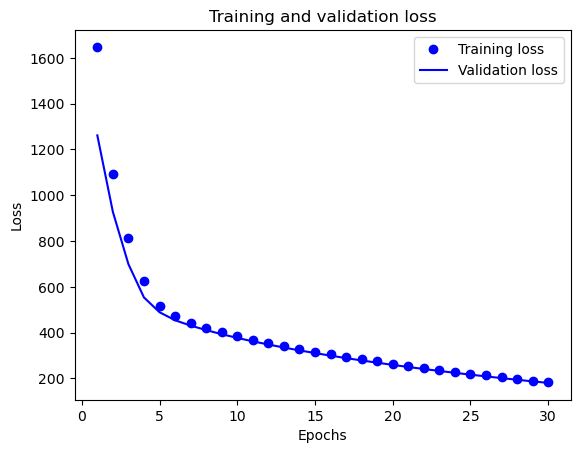

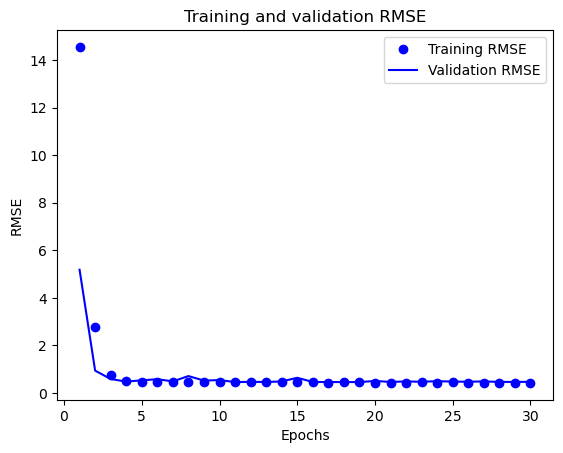

In [589]:
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

aveOralF_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=keras.regularizers.l1(0.3)),
    keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l1(0.3)),
    keras.layers.Dense(1)
])
# root mean square error - regression - Classification use Recall/Precision
aveOralF_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                validation_split=0.2,
                callbacks=[checkpoint_cb],)
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)  


In [590]:
test_loss,test_root_mean_square_error = aveOralF_model.evaluate(X_aveOralF_test,y_aveOralF_test)
print("RMSE", test_root_mean_square_error)

7/7 [==============================] - 0s 4ms/step - loss: 180.3051 - root_mean_squared_error: 0.4047
RMSE 0.4047209918498993


### aveOralM

Epoch 1/30
21/21 [==============================] - 2s 36ms/step - loss: 1504.6172 - root_mean_squared_error: 9.0084 - val_loss: 1222.0203 - val_root_mean_squared_error: 4.5080
Epoch 2/30
21/21 [==============================] - 0s 11ms/step - loss: 1042.8073 - root_mean_squared_error: 2.4275 - val_loss: 861.8144 - val_root_mean_squared_error: 1.2164
Epoch 3/30
21/21 [==============================] - 0s 11ms/step - loss: 736.2530 - root_mean_squared_error: 0.6874 - val_loss: 607.6898 - val_root_mean_squared_error: 0.4829
Epoch 4/30
21/21 [==============================] - 0s 11ms/step - loss: 525.6248 - root_mean_squared_error: 0.4178 - val_loss: 447.3102 - val_root_mean_squared_error: 0.4223
Epoch 5/30
21/21 [==============================] - 0s 11ms/step - loss: 409.0280 - root_mean_squared_error: 0.4557 - val_loss: 378.5223 - val_root_mean_squared_error: 0.5143
Epoch 6/30
21/21 [==============================] - 0s 10ms/step - loss: 359.7546 - root_mean_squared_error: 0.4033 - val_

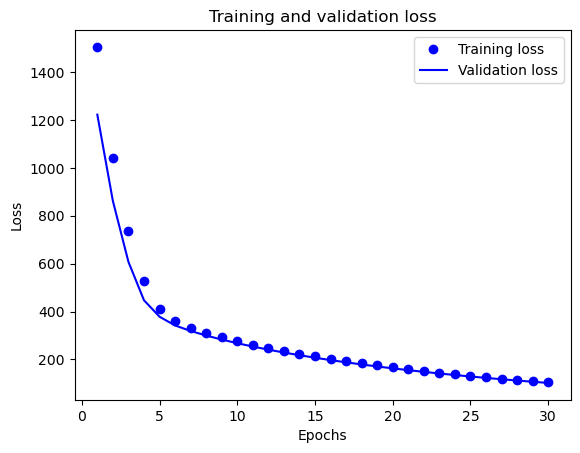

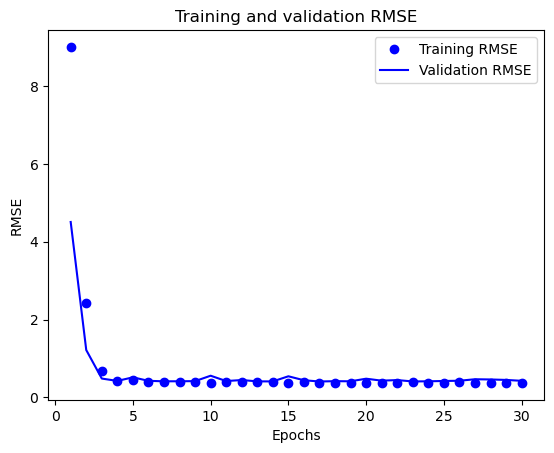

In [598]:
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

aveOralM_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=keras.regularizers.l1(0.3)),
    keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l1(0.3)),
    keras.layers.Dense(1)
])
# root mean square error - regression - Classification use Recall/Precision
aveOralM_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                validation_split=0.2,
                callbacks=[checkpoint_cb],)
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)  


In [599]:
test_loss,test_root_mean_square_error = aveOralM_model.evaluate(X_aveOralM_test,y_aveOralM_test)
print("RMSE", test_root_mean_square_error)

7/7 [==============================] - 0s 5ms/step - loss: 102.0648 - root_mean_squared_error: 0.3542
RMSE 0.35423365235328674


# Leaky ReLu

### aveOralF

Epoch 1/30
21/21 [==============================] - 2s 38ms/step - loss: 461.6343 - root_mean_squared_error: 21.4857 - val_loss: 9.5161 - val_root_mean_squared_error: 3.0848
Epoch 2/30
21/21 [==============================] - 0s 14ms/step - loss: 17.6893 - root_mean_squared_error: 4.2059 - val_loss: 7.2555 - val_root_mean_squared_error: 2.6936
Epoch 3/30
21/21 [==============================] - 0s 14ms/step - loss: 1.7920 - root_mean_squared_error: 1.3386 - val_loss: 0.3597 - val_root_mean_squared_error: 0.5998
Epoch 4/30
21/21 [==============================] - 0s 16ms/step - loss: 0.3353 - root_mean_squared_error: 0.5791 - val_loss: 0.1844 - val_root_mean_squared_error: 0.4294
Epoch 5/30
21/21 [==============================] - 0s 15ms/step - loss: 0.1863 - root_mean_squared_error: 0.4316 - val_loss: 0.1820 - val_root_mean_squared_error: 0.4266
Epoch 6/30
21/21 [==============================] - 0s 11ms/step - loss: 0.1621 - root_mean_squared_error: 0.4026 - val_loss: 0.1909 - val_ro

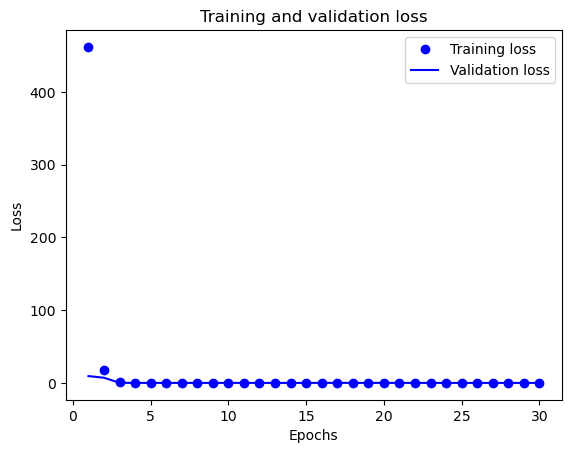

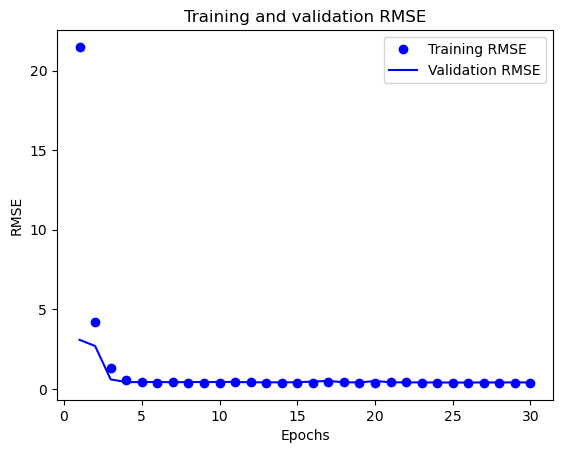

In [592]:
tf.random.set_seed(42)
np.random.seed(42)

aveOralF_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1)
])
# Compile the model
# Define checkpoint callback
aveOralF_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2 ,
                    callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [593]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test,y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 4ms/step - loss: 0.1414 - root_mean_squared_error: 0.3761
RMSE 0.3760608434677124


### aveOralM

Epoch 1/30
21/21 [==============================] - 2s 34ms/step - loss: 534.7328 - root_mean_squared_error: 23.1243 - val_loss: 25.5413 - val_root_mean_squared_error: 5.0538
Epoch 2/30
21/21 [==============================] - 0s 12ms/step - loss: 23.1539 - root_mean_squared_error: 4.8118 - val_loss: 8.9746 - val_root_mean_squared_error: 2.9958
Epoch 3/30
21/21 [==============================] - 0s 13ms/step - loss: 2.3003 - root_mean_squared_error: 1.5167 - val_loss: 0.5072 - val_root_mean_squared_error: 0.7121
Epoch 4/30
21/21 [==============================] - 0s 12ms/step - loss: 0.3962 - root_mean_squared_error: 0.6295 - val_loss: 0.2077 - val_root_mean_squared_error: 0.4557
Epoch 5/30
21/21 [==============================] - 0s 11ms/step - loss: 0.1883 - root_mean_squared_error: 0.4339 - val_loss: 0.1672 - val_root_mean_squared_error: 0.4089
Epoch 6/30
21/21 [==============================] - 0s 10ms/step - loss: 0.1472 - root_mean_squared_error: 0.3836 - val_loss: 0.1763 - val_r

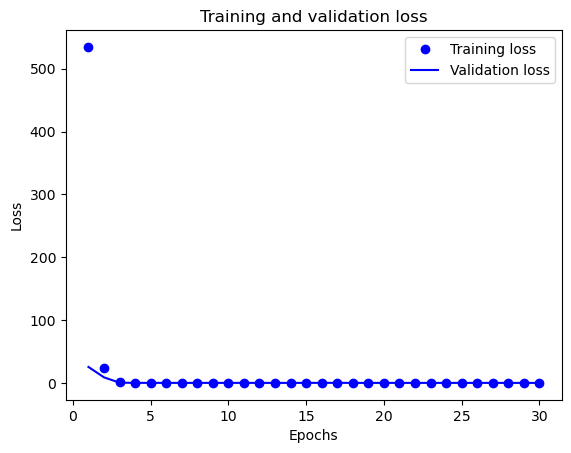

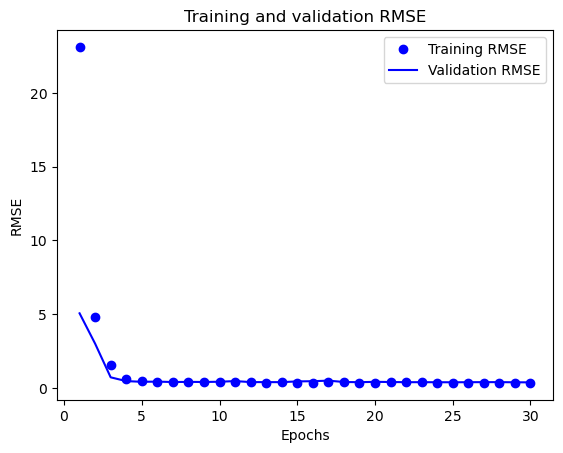

In [601]:
tf.random.set_seed(42)
np.random.seed(42)

aveOralM_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1)
])
# Compile the model
# Define checkpoint callback
aveOralM_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2 ,
                    callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [602]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test,y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 5ms/step - loss: 0.1171 - root_mean_squared_error: 0.3422
RMSE 0.3422413468360901


# PReLU

### aveOralF

In [660]:
tf.random.set_seed(42)
np.random.seed(42)

aveOralF_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(1)
])

In [661]:
aveOralF_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 3s 41ms/step - loss: 28.6405 - root_mean_squared_error: 5.3517 - val_loss: 7.6871 - val_root_mean_squared_error: 2.7726
Epoch 2/30
21/21 [==============================] - 0s 9ms/step - loss: 2.8568 - root_mean_squared_error: 1.6902 - val_loss: 1.4809 - val_root_mean_squared_error: 1.2169
Epoch 3/30
21/21 [==============================] - 0s 9ms/step - loss: 0.8818 - root_mean_squared_error: 0.9390 - val_loss: 0.5224 - val_root_mean_squared_error: 0.7228
Epoch 4/30
21/21 [==============================] - 0s 8ms/step - loss: 0.5030 - root_mean_squared_error: 0.7092 - val_loss: 0.3085 - val_root_mean_squared_error: 0.5554
Epoch 5/30
21/21 [==============================] - 0s 7ms/step - loss: 0.3232 - root_mean_squared_error: 0.5685 - val_loss: 0.2525 - val_root_mean_squared_error: 0.5025
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.2373 - root_mean_squared_error: 0.4871 - val_loss: 0.2802 - val_root_mean_

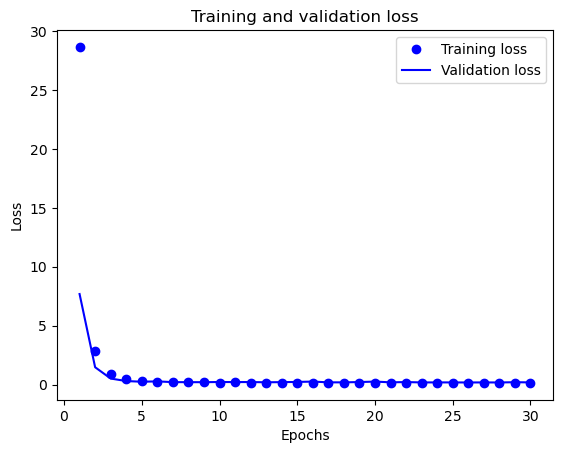

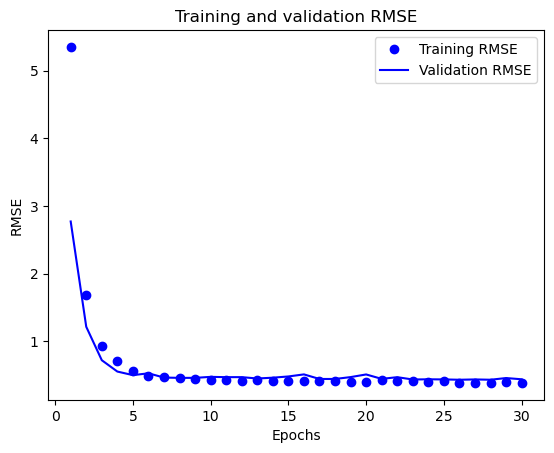

In [662]:
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [663]:
test_loss,test_root_mean_square_error = aveOralF_model.evaluate(X_aveOralF_test,y_aveOralF_test)
print("RMSE", test_root_mean_square_error)

7/7 [==============================] - 0s 2ms/step - loss: 0.1446 - root_mean_squared_error: 0.3803
RMSE 0.3802614212036133


#### aveOralM

In [607]:
tf.random.set_seed(42)
np.random.seed(42)

aveOralM_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(1)
])

In [608]:
aveOralM_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 10s 44ms/step - loss: 217.0993 - root_mean_squared_error: 14.7343 - val_loss: 47.4343 - val_root_mean_squared_error: 6.8873
Epoch 2/30
21/21 [==============================] - 0s 11ms/step - loss: 11.7936 - root_mean_squared_error: 3.4342 - val_loss: 3.6937 - val_root_mean_squared_error: 1.9219
Epoch 3/30
21/21 [==============================] - 0s 10ms/step - loss: 1.6161 - root_mean_squared_error: 1.2713 - val_loss: 0.3996 - val_root_mean_squared_error: 0.6321
Epoch 4/30
21/21 [==============================] - 0s 7ms/step - loss: 0.7783 - root_mean_squared_error: 0.8822 - val_loss: 0.4868 - val_root_mean_squared_error: 0.6977
Epoch 5/30
21/21 [==============================] - 0s 10ms/step - loss: 0.6003 - root_mean_squared_error: 0.7748 - val_loss: 0.3526 - val_root_mean_squared_error: 0.5938
Epoch 6/30
21/21 [==============================] - 0s 11ms/step - loss: 0.5390 - root_mean_squared_error: 0.7342 - val_loss: 0.3277 - val_r

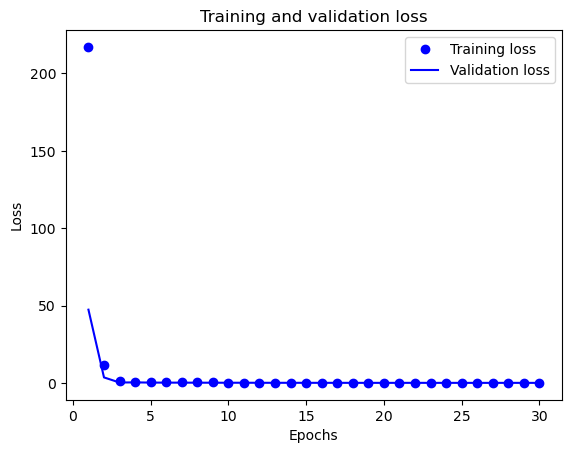

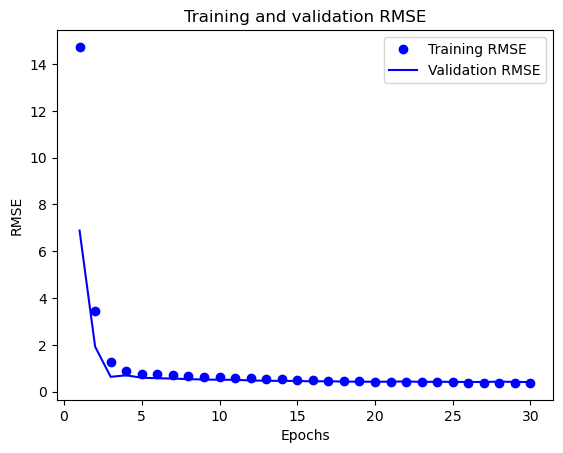

In [609]:
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [610]:
test_loss,test_root_mean_square_error = aveOralM_model.evaluate(X_aveOralM_test,y_aveOralM_test)
print("RMSE", test_root_mean_square_error)

7/7 [==============================] - 0s 6ms/step - loss: 0.1232 - root_mean_squared_error: 0.3511
RMSE 0.35105767846107483


# SELU

### aveOralF

In [742]:
np.random.seed(42)
tf.random.set_seed(42)

In [743]:
aveOralF_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
aveOralF_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    aveOralF_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
aveOralF_model.add(keras.layers.Dense(1))

In [744]:
aveOralF_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 23s 351ms/step - loss: 271.2921 - root_mean_squared_error: 16.4709 - val_loss: 1.1299 - val_root_mean_squared_error: 1.0630
Epoch 2/30
21/21 [==============================] - 5s 232ms/step - loss: 1.7351 - root_mean_squared_error: 1.3172 - val_loss: 0.8432 - val_root_mean_squared_error: 0.9182
Epoch 3/30
21/21 [==============================] - 5s 223ms/step - loss: 0.3210 - root_mean_squared_error: 0.5665 - val_loss: 0.1684 - val_root_mean_squared_error: 0.4104
Epoch 4/30
21/21 [==============================] - 5s 220ms/step - loss: 0.1915 - root_mean_squared_error: 0.4376 - val_loss: 0.1324 - val_root_mean_squared_error: 0.3638
Epoch 5/30
21/21 [==============================] - 4s 190ms/step - loss: 0.1702 - root_mean_squared_error: 0.4125 - val_loss: 0.1178 - val_root_mean_squared_error: 0.3433
Epoch 6/30
21/21 [==============================] - 4s 171ms/step - loss: 0.1820 - root_mean_squared_error: 0.4266 - val_loss: 0.1182 - 

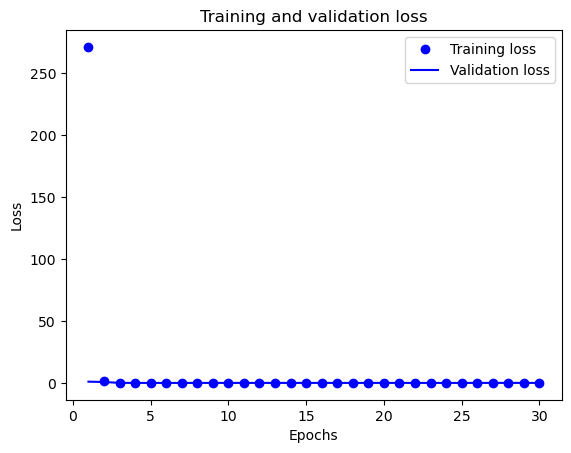

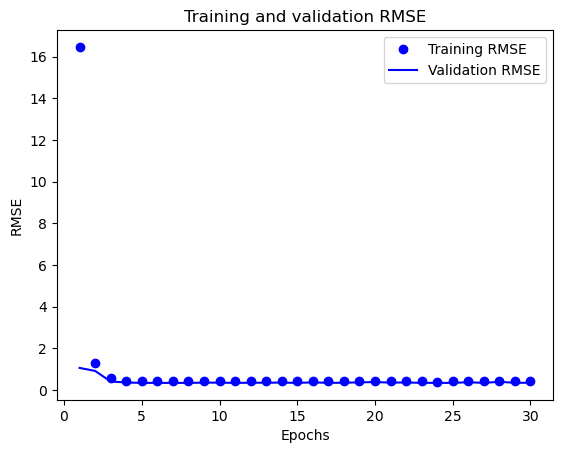

In [745]:
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [746]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 51ms/step - loss: 0.1207 - root_mean_squared_error: 0.3473
RMSE 0.3473476767539978


### aveOralM

In [747]:
np.random.seed(42)
tf.random.set_seed(42)

In [748]:
aveOralM_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
aveOralM_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    aveOralM_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
aveOralM_model.add(keras.layers.Dense(1))

In [749]:
aveOralM_model.compile(loss="mse" , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 23s 359ms/step - loss: 229.3885 - root_mean_squared_error: 15.1456 - val_loss: 1.1069 - val_root_mean_squared_error: 1.0521
Epoch 2/30
21/21 [==============================] - 5s 227ms/step - loss: 0.9656 - root_mean_squared_error: 0.9826 - val_loss: 0.2955 - val_root_mean_squared_error: 0.5436
Epoch 3/30
21/21 [==============================] - 3s 144ms/step - loss: 0.4056 - root_mean_squared_error: 0.6368 - val_loss: 0.3149 - val_root_mean_squared_error: 0.5612
Epoch 4/30
21/21 [==============================] - 4s 204ms/step - loss: 0.3383 - root_mean_squared_error: 0.5817 - val_loss: 0.2775 - val_root_mean_squared_error: 0.5268
Epoch 5/30
21/21 [==============================] - 4s 206ms/step - loss: 0.2954 - root_mean_squared_error: 0.5435 - val_loss: 0.2236 - val_root_mean_squared_error: 0.4728
Epoch 6/30
21/21 [==============================] - 4s 166ms/step - loss: 0.3058 - root_mean_squared_error: 0.5530 - val_loss: 0.2988 - 

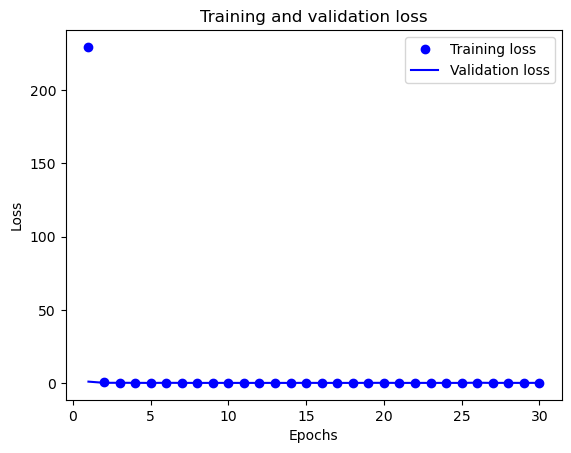

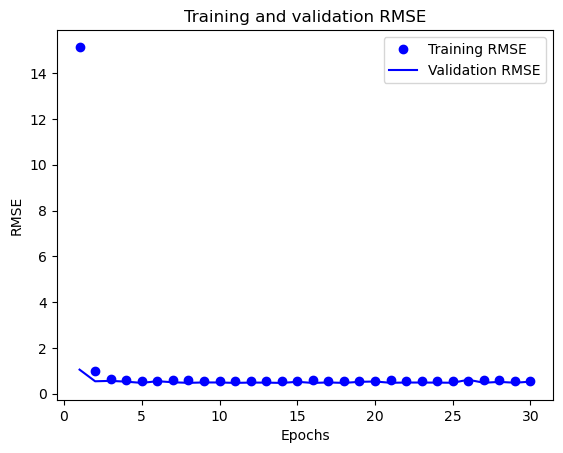

In [750]:
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [751]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 51ms/step - loss: 0.2106 - root_mean_squared_error: 0.4589
RMSE 0.4588989317417145


# RELU

### aveOralF

In [737]:
np.random.seed(42)
tf.random.set_seed(42)

In [738]:
aveOralF_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
aveOralF_model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    aveOralF_model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
aveOralF_model.add(keras.layers.Dense(1))

In [739]:
aveOralF_model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 28s 340ms/step - loss: 233655.3125 - root_mean_squared_error: 483.3791 - val_loss: 5.7426 - val_root_mean_squared_error: 2.3964
Epoch 2/30
21/21 [==============================] - 3s 152ms/step - loss: 37.8895 - root_mean_squared_error: 6.1554 - val_loss: 33.5444 - val_root_mean_squared_error: 5.7918
Epoch 3/30
21/21 [==============================] - 5s 223ms/step - loss: 13.4926 - root_mean_squared_error: 3.6732 - val_loss: 0.3419 - val_root_mean_squared_error: 0.5847
Epoch 4/30
21/21 [==============================] - 4s 175ms/step - loss: 1.3685 - root_mean_squared_error: 1.1698 - val_loss: 0.4084 - val_root_mean_squared_error: 0.6391
Epoch 5/30
21/21 [==============================] - 5s 231ms/step - loss: 0.4671 - root_mean_squared_error: 0.6835 - val_loss: 0.2767 - val_root_mean_squared_error: 0.5261
Epoch 6/30
21/21 [==============================] - 3s 161ms/step - loss: 0.3168 - root_mean_squared_error: 0.5628 - val_loss: 0.

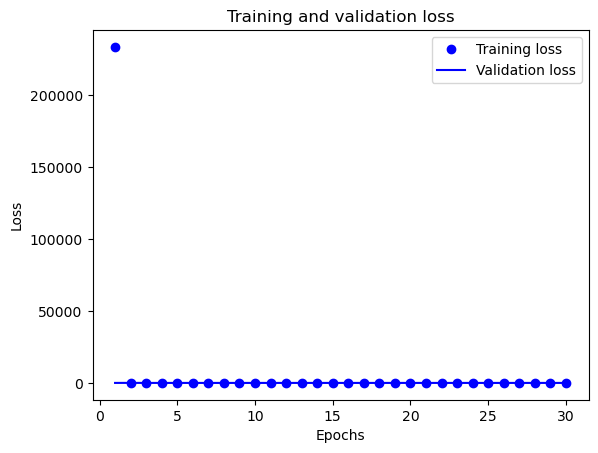

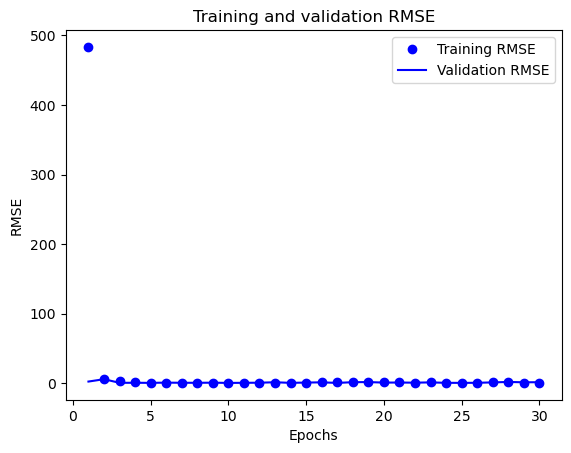

In [740]:
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [741]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 47ms/step - loss: 0.1692 - root_mean_squared_error: 0.4113
RMSE 0.41129255294799805


### aveOralM

In [727]:
np.random.seed(42)
tf.random.set_seed(42)

In [728]:
aveOralM_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
aveOralM_model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    aveOralM_model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
aveOralM_model.add(keras.layers.Dense(1))

In [729]:
aveOralM_model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
21/21 [==============================] - 18s 341ms/step - loss: 2718.6025 - root_mean_squared_error: 52.1402 - val_loss: 400.5504 - val_root_mean_squared_error: 20.0138
Epoch 2/30
21/21 [==============================] - 5s 223ms/step - loss: 76.1390 - root_mean_squared_error: 8.7258 - val_loss: 5.1079 - val_root_mean_squared_error: 2.2601
Epoch 3/30
21/21 [==============================] - 4s 196ms/step - loss: 1.8368 - root_mean_squared_error: 1.3553 - val_loss: 0.7422 - val_root_mean_squared_error: 0.8615
Epoch 4/30
21/21 [==============================] - 3s 166ms/step - loss: 1.2788 - root_mean_squared_error: 1.1309 - val_loss: 3.6349 - val_root_mean_squared_error: 1.9065
Epoch 5/30
21/21 [==============================] - 3s 165ms/step - loss: 3.6772 - root_mean_squared_error: 1.9176 - val_loss: 4.1644 - val_root_mean_squared_error: 2.0407
Epoch 6/30
21/21 [==============================] - 4s 168ms/step - loss: 1.0863 - root_mean_squared_error: 1.0423 - val_loss: 0.91

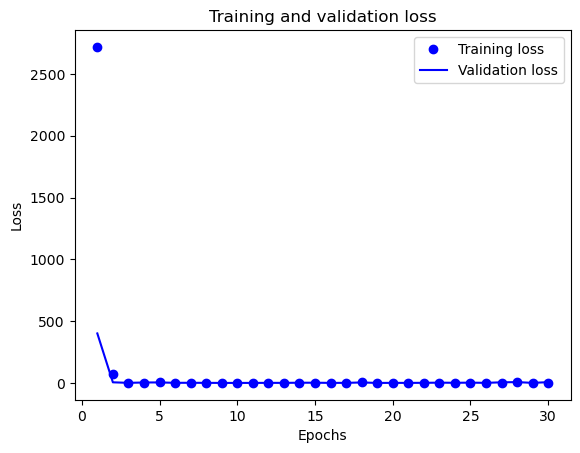

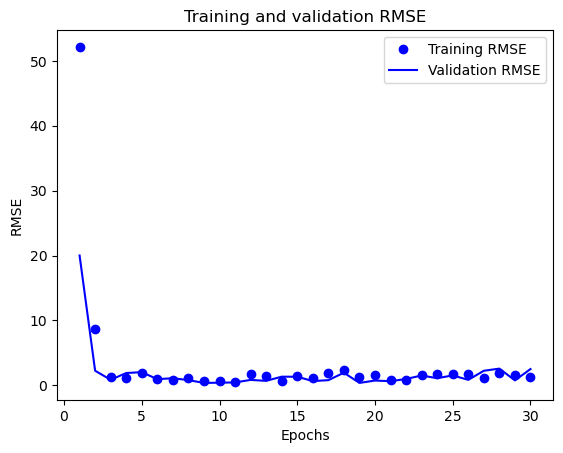

In [730]:
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [731]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 2s 78ms/step - loss: 0.1089 - root_mean_squared_error: 0.3300
RMSE 0.3300146460533142


# Max norm regularization

### aveOralF

In [775]:
tf.random.set_seed(42)
np.random.seed(42)
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

Epoch 1/30
21/21 [==============================] - 2s 34ms/step - loss: 120.8556 - root_mean_squared_error: 10.9934 - val_loss: 1.1756 - val_root_mean_squared_error: 1.0842
Epoch 2/30
21/21 [==============================] - 0s 13ms/step - loss: 7.5530 - root_mean_squared_error: 2.7483 - val_loss: 0.2927 - val_root_mean_squared_error: 0.5411
Epoch 3/30
21/21 [==============================] - 0s 11ms/step - loss: 1.1236 - root_mean_squared_error: 1.0600 - val_loss: 0.7998 - val_root_mean_squared_error: 0.8943
Epoch 4/30
21/21 [==============================] - 0s 12ms/step - loss: 0.3129 - root_mean_squared_error: 0.5594 - val_loss: 0.1786 - val_root_mean_squared_error: 0.4226
Epoch 5/30
21/21 [==============================] - 0s 13ms/step - loss: 0.1720 - root_mean_squared_error: 0.4148 - val_loss: 0.1534 - val_root_mean_squared_error: 0.3917
Epoch 6/30
21/21 [==============================] - 0s 15ms/step - loss: 0.1380 - root_mean_squared_error: 0.3714 - val_loss: 0.1479 - val_roo

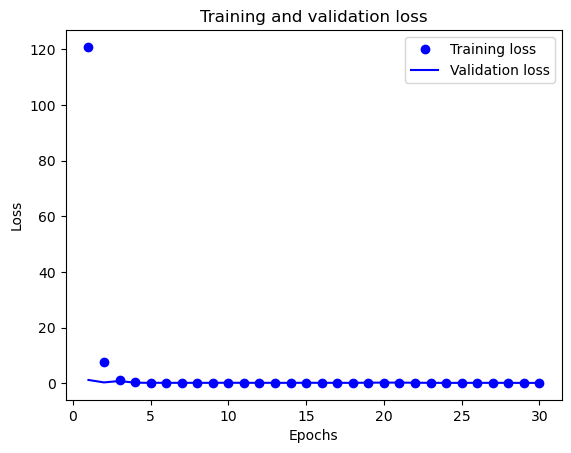

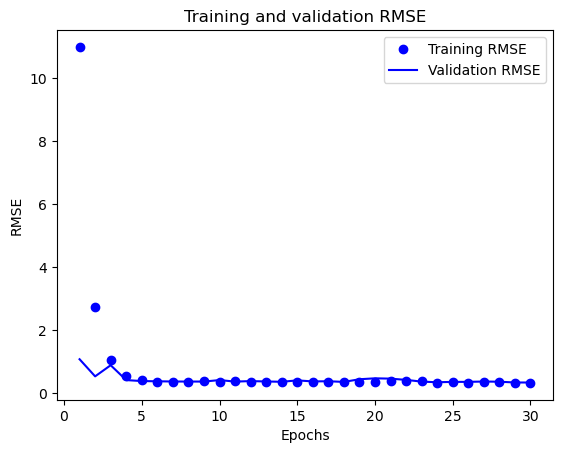

In [776]:
from functools import partial

# We limit the weights in a layer, by imposing a constraint on the L2 norm of vectors of weights to be under
# a threshold, here 1. This diminish the flexibility of the network, so helps preventing overfitting 

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

aveOralF_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(1)
])
aveOralF_model.compile(loss="mse", optimizer="Adam", metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=n_epochs,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [777]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 4ms/step - loss: 0.0977 - root_mean_squared_error: 0.3125
RMSE 0.31252944469451904


### aveOralM

In [778]:
tf.random.set_seed(42)
np.random.seed(42)
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

Epoch 1/30
21/21 [==============================] - 2s 34ms/step - loss: 145.5192 - root_mean_squared_error: 12.0631 - val_loss: 0.8814 - val_root_mean_squared_error: 0.9388
Epoch 2/30
21/21 [==============================] - 0s 9ms/step - loss: 9.9794 - root_mean_squared_error: 3.1590 - val_loss: 4.5046 - val_root_mean_squared_error: 2.1224
Epoch 3/30
21/21 [==============================] - 0s 13ms/step - loss: 1.7832 - root_mean_squared_error: 1.3354 - val_loss: 0.7110 - val_root_mean_squared_error: 0.8432
Epoch 4/30
21/21 [==============================] - 0s 13ms/step - loss: 0.5883 - root_mean_squared_error: 0.7670 - val_loss: 0.3763 - val_root_mean_squared_error: 0.6135
Epoch 5/30
21/21 [==============================] - 0s 13ms/step - loss: 0.2916 - root_mean_squared_error: 0.5400 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4568
Epoch 6/30
21/21 [==============================] - 0s 13ms/step - loss: 0.1632 - root_mean_squared_error: 0.4040 - val_loss: 0.1691 - val_root

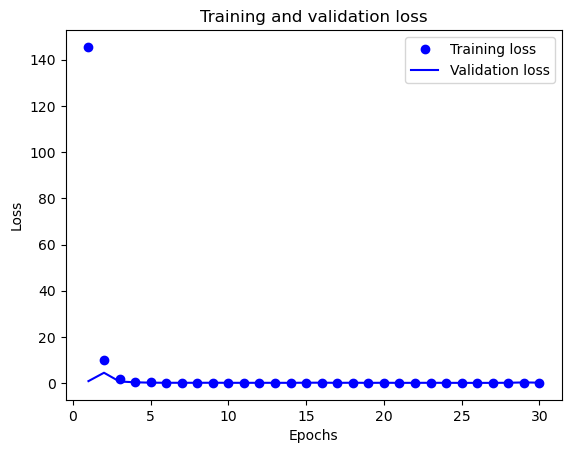

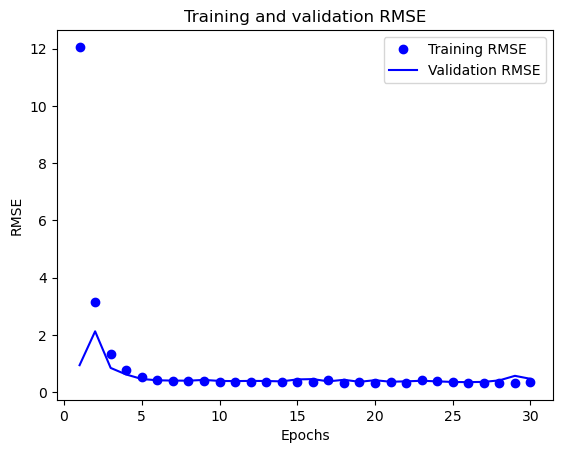

In [779]:
from functools import partial

# We limit the weights in a layer, by imposing a constraint on the L2 norm of vectors of weights to be under
# a threshold, here 1. This diminish the flexibility of the network, so helps preventing overfitting 

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

aveOralM_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(1)
])
aveOralM_model.compile(loss="mse", optimizer="Adam", metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_modelone.h5", save_best_only=True)

n_epochs = 30
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=n_epochs,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
aveOralM_model = keras.models.load_model("my_keras_modelone.h5") # rollback to best model
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)

In [780]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 4ms/step - loss: 0.0742 - root_mean_squared_error: 0.2724
RMSE 0.2723824977874756


## Drop regularization

### aveOralF

In [995]:
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/30
21/21 [==============================] - 2s 38ms/step - loss: 126.8523 - root_mean_squared_error: 11.2629 - val_loss: 5.7299 - val_root_mean_squared_error: 2.3937
Epoch 2/30
21/21 [==============================] - 0s 13ms/step - loss: 8.0708 - root_mean_squared_error: 2.8409 - val_loss: 0.9520 - val_root_mean_squared_error: 0.9757
Epoch 3/30
21/21 [==============================] - 0s 14ms/step - loss: 2.7413 - root_mean_squared_error: 1.6557 - val_loss: 0.7167 - val_root_mean_squared_error: 0.8466
Epoch 4/30
21/21 [==============================] - 0s 14ms/step - loss: 2.1438 - root_mean_squared_error: 1.4642 - val_loss: 0.3621 - val_root_mean_squared_error: 0.6017
Epoch 5/30
21/21 [==============================] - 0s 15ms/step - loss: 2.0309 - root_mean_squared_error: 1.4251 - val_loss: 0.1772 - val_root_mean_squared_error: 0.4210
Epoch 6/30
21/21 [==============================] - 0s 12ms/step - loss: 1.8751 - root_mean_squared_error: 1.3693 - val_loss: 0.3583 - val_roo

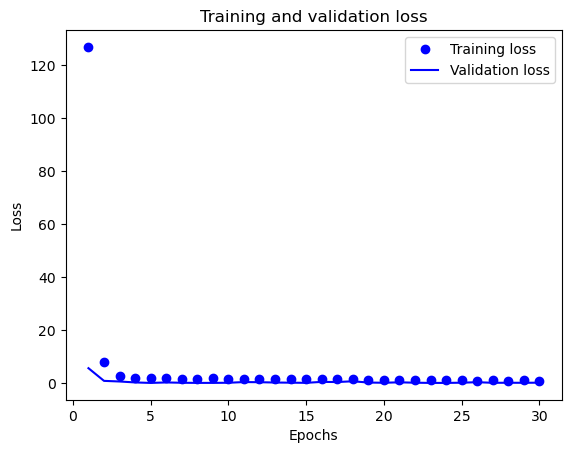

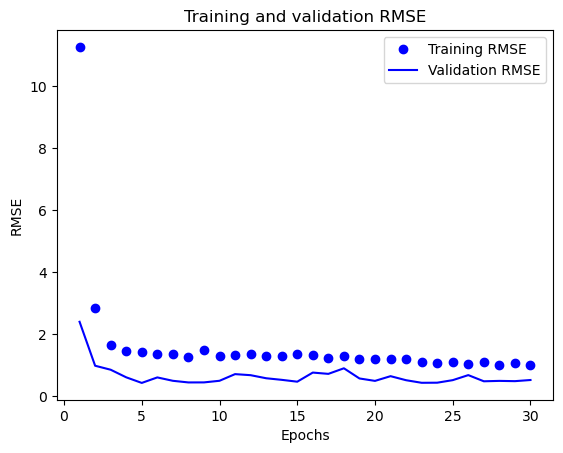

In [996]:
aveOralF_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(1)
])
aveOralF_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=n_epochs,
                    validation_split =0.2,
                    callbacks=[checkpoint_cb])
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)


In [997]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 4ms/step - loss: 0.1884 - root_mean_squared_error: 0.4340
RMSE 0.43402132391929626


### aveOralM

In [1004]:
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/30
21/21 [==============================] - 2s 31ms/step - loss: 379.0817 - root_mean_squared_error: 19.4700 - val_loss: 13.9808 - val_root_mean_squared_error: 3.7391
Epoch 2/30
21/21 [==============================] - 0s 12ms/step - loss: 22.7994 - root_mean_squared_error: 4.7749 - val_loss: 7.5906 - val_root_mean_squared_error: 2.7551
Epoch 3/30
21/21 [==============================] - 0s 13ms/step - loss: 6.0436 - root_mean_squared_error: 2.4584 - val_loss: 0.5811 - val_root_mean_squared_error: 0.7623
Epoch 4/30
21/21 [==============================] - 0s 15ms/step - loss: 4.3853 - root_mean_squared_error: 2.0941 - val_loss: 0.2389 - val_root_mean_squared_error: 0.4888
Epoch 5/30
21/21 [==============================] - 0s 13ms/step - loss: 4.3832 - root_mean_squared_error: 2.0936 - val_loss: 0.2329 - val_root_mean_squared_error: 0.4826
Epoch 6/30
21/21 [==============================] - 0s 9ms/step - loss: 3.7082 - root_mean_squared_error: 1.9257 - val_loss: 0.3048 - val_ro

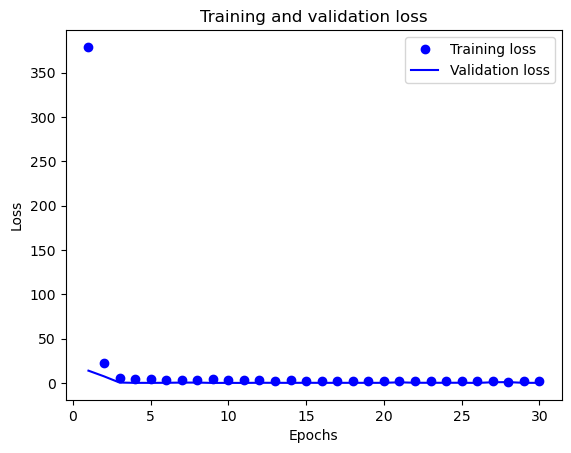

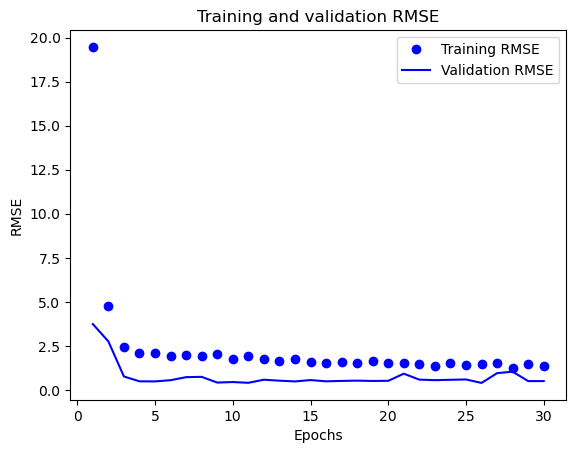

In [1005]:
aveOralM_model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(1)
])
aveOralM_model.compile(loss="mse", optimizer="Adam", metrics=[keras.metrics.RootMeanSquaredError()])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=n_epochs,
                    validation_split =0.2,
                    callbacks=[checkpoint_cb])
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)


In [1006]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 7ms/step - loss: 0.1733 - root_mean_squared_error: 0.4163
RMSE 0.4162690043449402


## Random forest

### aveOralF

In [1023]:
np.random.seed(42)
tf.random.set_seed(42)

In [1024]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [1025]:
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_aveOralF_train, y_aveOralF_train, scoring='neg_root_mean_squared_error', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [-0.28723028 -0.24508491 -0.25568015 -0.25589288 -0.23028537 -0.19505892
 -0.25085428 -0.24656935 -0.18527797 -0.23107363 -0.27436728 -0.25928828
 -0.27093132 -0.19819054 -0.23195484]
mean:  -0.24118266681367848


### aveOralM

In [1026]:
np.random.seed(42)
tf.random.set_seed(42)

In [1027]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [1028]:
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_aveOralM_train, y_aveOralM_train, scoring='neg_root_mean_squared_error', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [-0.25098215 -0.23465817 -0.24346353 -0.22685185 -0.24492796 -0.23859104
 -0.27911062 -0.26084355 -0.23344945 -0.31367049 -0.27768742 -0.2670086
 -0.29891465 -0.2551494  -0.24399872]
mean:  -0.25795384059179455


## Batch Normalization

### aveOralF

In [1044]:
aveOralF_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

In [1045]:
aveOralF_model.summary()

Model: "sequential_306"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 46)                0         
                                                                 
 batch_normalization_9 (Batc  (None, 46)               184       
 hNormalization)                                                 
                                                                 
 dense_3377 (Dense)          (None, 300)               14100     
                                                                 
 batch_normalization_10 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_3378 (Dense)          (None, 100)               30100     
                                                                 
 batch_normalization_11 (Bat  (None, 100)           

In [1046]:
aveOralF_model.compile(loss="mse",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError()])

Epoch 1/30
21/21 [==============================] - 2s 21ms/step - loss: 1358.8182 - root_mean_squared_error: 36.8622 - val_loss: 474.6844 - val_root_mean_squared_error: 21.7873
Epoch 2/30
21/21 [==============================] - 0s 6ms/step - loss: 1333.1399 - root_mean_squared_error: 36.5122 - val_loss: 1220.6169 - val_root_mean_squared_error: 34.9373
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 1296.9230 - root_mean_squared_error: 36.0128 - val_loss: 1468.6162 - val_root_mean_squared_error: 38.3225
Epoch 4/30
21/21 [==============================] - 0s 6ms/step - loss: 1248.2627 - root_mean_squared_error: 35.3308 - val_loss: 1084.1128 - val_root_mean_squared_error: 32.9259
Epoch 5/30
21/21 [==============================] - 0s 7ms/step - loss: 1186.8478 - root_mean_squared_error: 34.4507 - val_loss: 1080.8228 - val_root_mean_squared_error: 32.8759
Epoch 6/30
21/21 [==============================] - 0s 7ms/step - loss: 1113.5560 - root_mean_squared_error: 3

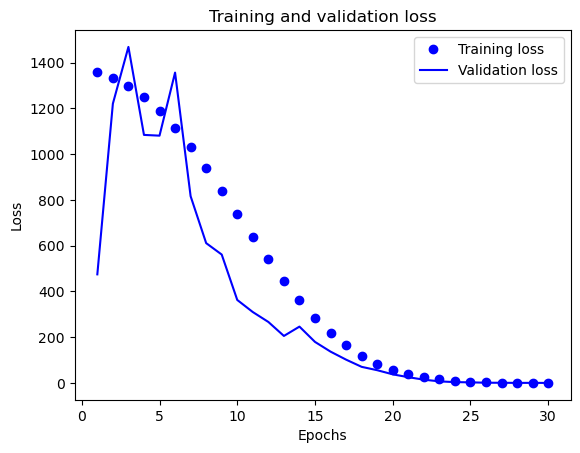

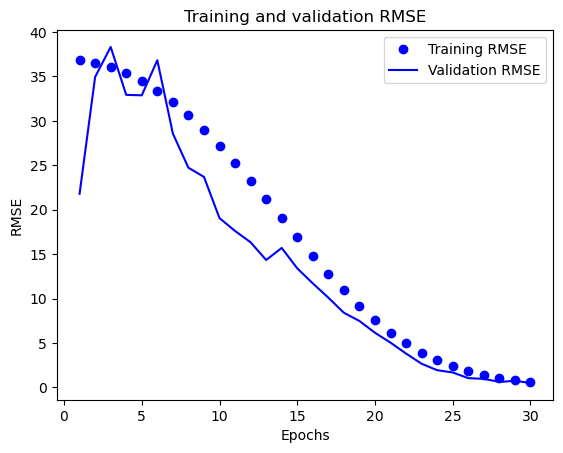

In [1047]:
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2)
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print()

# Plot the learning curves
plot_history_regression(history)


In [1048]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 1ms/step - loss: 0.3413 - root_mean_squared_error: 0.5842
RMSE 0.5842152237892151


In [1054]:
aveOralM_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

In [1055]:
aveOralM_model.summary()

Model: "sequential_308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 46)                0         
                                                                 
 batch_normalization_15 (Bat  (None, 46)               184       
 chNormalization)                                                
                                                                 
 dense_3383 (Dense)          (None, 300)               14100     
                                                                 
 batch_normalization_16 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_3384 (Dense)          (None, 100)               30100     
                                                                 
 batch_normalization_17 (Bat  (None, 100)           

In [1056]:
aveOralM_model.compile(loss="mse",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError()])

Epoch 1/30
21/21 [==============================] - 2s 21ms/step - loss: 1361.8706 - root_mean_squared_error: 36.9035 - val_loss: 788.0225 - val_root_mean_squared_error: 28.0717
Epoch 2/30
21/21 [==============================] - 0s 6ms/step - loss: 1335.7900 - root_mean_squared_error: 36.5485 - val_loss: 372.5887 - val_root_mean_squared_error: 19.3026
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 1299.4618 - root_mean_squared_error: 36.0480 - val_loss: 559.6501 - val_root_mean_squared_error: 23.6569
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 1250.6263 - root_mean_squared_error: 35.3642 - val_loss: 917.5181 - val_root_mean_squared_error: 30.2906
Epoch 5/30
21/21 [==============================] - 0s 5ms/step - loss: 1189.0927 - root_mean_squared_error: 34.4832 - val_loss: 424.3476 - val_root_mean_squared_error: 20.5997
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 1115.5818 - root_mean_squared_error: 33.40

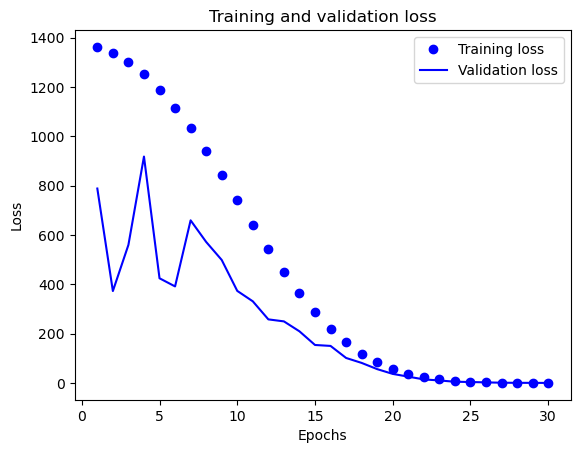

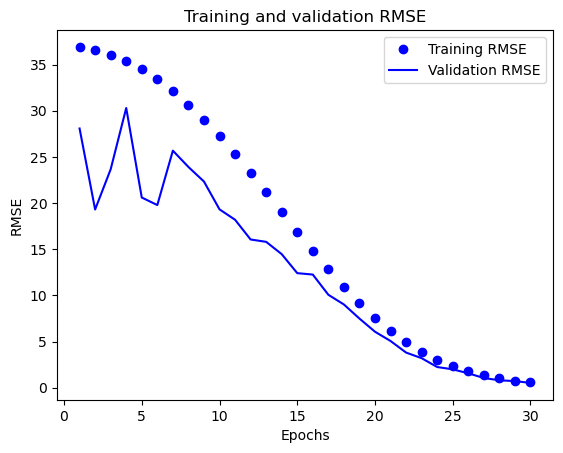

In [1057]:
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2)
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print()

# Plot the learning curves
plot_history_regression(history)


In [1058]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 3ms/step - loss: 0.3064 - root_mean_squared_error: 0.5535
RMSE 0.5535053014755249


## Functional API

### aveOralF

In [1079]:
np.random.seed(42)
tf.random.set_seed(42)

In [1080]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
aveOralF_model = keras.models.Model(inputs=[input_], outputs=[output])

In [1081]:
aveOralF_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_3386 (Dense)             (None, 300)          14100       ['input_1[0][0]']                
                                                                                                  
 dense_3387 (Dense)             (None, 300)          90300       ['dense_3386[0][0]']             
                                                                                                  
 concatenate (Concatenate)      (None, 346)          0           ['input_1[0][0]',                
                                                                  'dense_3387[0][0]']         

Epoch 1/30
21/21 [==============================] - 1s 15ms/step - loss: 14.6274 - root_mean_squared_error: 3.8246 - val_loss: 5.2464 - val_root_mean_squared_error: 2.2905
Epoch 2/30
21/21 [==============================] - 0s 5ms/step - loss: 1.4822 - root_mean_squared_error: 1.2175 - val_loss: 0.2871 - val_root_mean_squared_error: 0.5358
Epoch 3/30
21/21 [==============================] - 0s 5ms/step - loss: 0.2868 - root_mean_squared_error: 0.5355 - val_loss: 0.2148 - val_root_mean_squared_error: 0.4634
Epoch 4/30
21/21 [==============================] - 0s 5ms/step - loss: 0.1754 - root_mean_squared_error: 0.4188 - val_loss: 0.2120 - val_root_mean_squared_error: 0.4604
Epoch 5/30
21/21 [==============================] - 0s 5ms/step - loss: 0.1788 - root_mean_squared_error: 0.4229 - val_loss: 0.2617 - val_root_mean_squared_error: 0.5115
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.1705 - root_mean_squared_error: 0.4130 - val_loss: 0.2130 - val_root_mean_

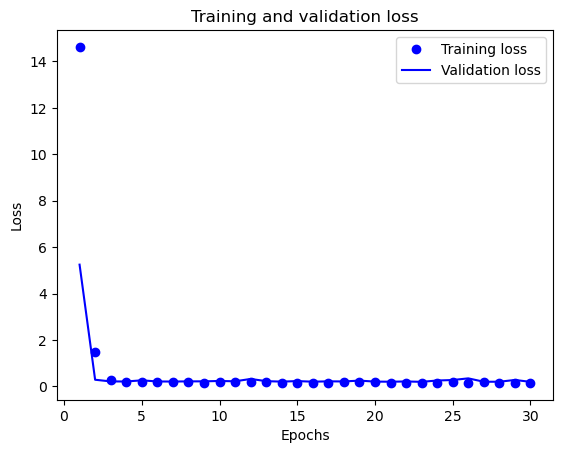

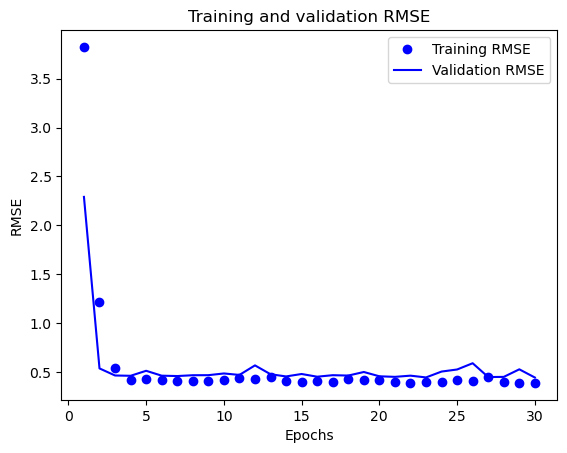

In [1084]:
aveOralF_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3),metrics=[keras.metrics.RootMeanSquaredError()])
history = aveOralF_model.fit(X_aveOralF_train, y_aveOralF_train, epochs=30,
                    validation_split =0.2)
rmse_test = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)

# Plot the learning curves
plot_history_regression(history)

In [1085]:
test_loss,test_root_mean_squared_error = aveOralF_model.evaluate(X_aveOralF_test, y_aveOralF_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 3ms/step - loss: 0.1715 - root_mean_squared_error: 0.4141
RMSE 0.4140692353248596


### aveOralM

In [1086]:
np.random.seed(42)
tf.random.set_seed(42)

In [1087]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
aveOralM_model = keras.models.Model(inputs=[input_], outputs=[output])

In [1088]:
aveOralM_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_3389 (Dense)             (None, 300)          14100       ['input_2[0][0]']                
                                                                                                  
 dense_3390 (Dense)             (None, 300)          90300       ['dense_3389[0][0]']             
                                                                                                  
 concatenate_1 (Concatenate)    (None, 346)          0           ['input_2[0][0]',                
                                                                  'dense_3390[0][0]']       

Epoch 1/30
21/21 [==============================] - 1s 19ms/step - loss: 175.4649 - root_mean_squared_error: 13.2463 - val_loss: 38.0964 - val_root_mean_squared_error: 6.1722
Epoch 2/30
21/21 [==============================] - 0s 7ms/step - loss: 11.1900 - root_mean_squared_error: 3.3451 - val_loss: 3.5476 - val_root_mean_squared_error: 1.8835
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 2.0704 - root_mean_squared_error: 1.4389 - val_loss: 0.5664 - val_root_mean_squared_error: 0.7526
Epoch 4/30
21/21 [==============================] - 0s 6ms/step - loss: 0.3172 - root_mean_squared_error: 0.5632 - val_loss: 0.1957 - val_root_mean_squared_error: 0.4424
Epoch 5/30
21/21 [==============================] - 0s 6ms/step - loss: 0.1798 - root_mean_squared_error: 0.4240 - val_loss: 0.2630 - val_root_mean_squared_error: 0.5128
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.1624 - root_mean_squared_error: 0.4030 - val_loss: 0.1769 - val_root_m

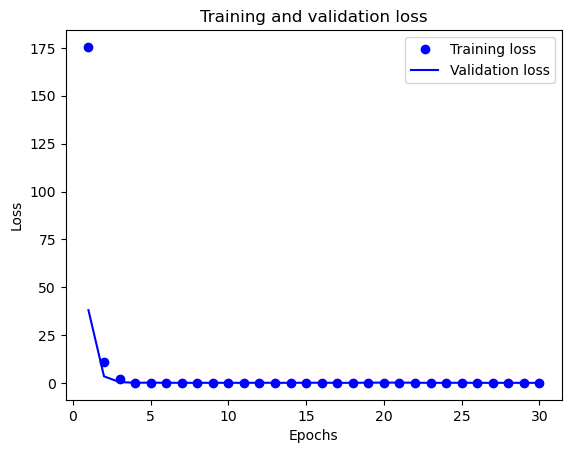

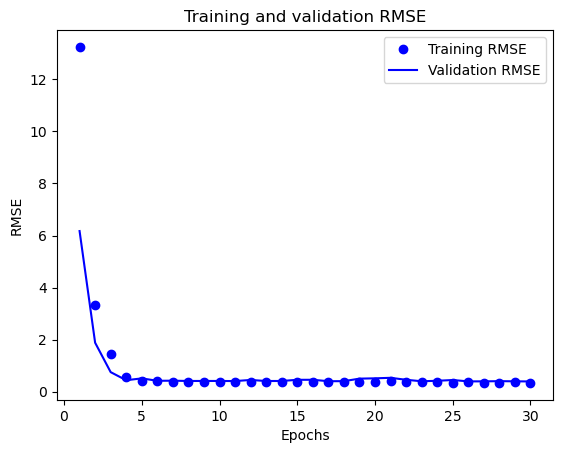

In [1089]:
aveOralM_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3),metrics=[keras.metrics.RootMeanSquaredError()])
history = aveOralM_model.fit(X_aveOralM_train, y_aveOralM_train, epochs=30,
                    validation_split =0.2)
rmse_test = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)

# Plot the learning curves
plot_history_regression(history)

In [1090]:
test_loss,test_root_mean_squared_error = aveOralM_model.evaluate(X_aveOralM_test, y_aveOralM_test)
print("RMSE", test_root_mean_squared_error)

7/7 [==============================] - 0s 3ms/step - loss: 0.0977 - root_mean_squared_error: 0.3126
RMSE 0.3125641345977783


# Classification

### Create dataframe for aveOralF and aveOralM

In [629]:
## Create dataframe and if aveOralF is smaller than 37.5 set the adjecent column to 0 else 1
set_fever = np.where(y['aveOralF'] >= 37.5,1,0)

dataFrameF = pd.DataFrame({
    'aveOralF': y['aveOralF'],
    'fever': set_fever
})
print(dataFrameF.iloc[66])
dataFrameF

aveOralF    37.75
fever        1.00
Name: 66, dtype: float64


,aveOralF,fever
0,36.85,0
1,37.00,0
2,37.20,0
3,36.85,0
4,36.80,0
...,...,...
1015,36.95,0
1016,37.25,0
1017,37.35,0
1018,37.15,0


In [649]:
dataFrameF['fever'].value_counts()

fever
0    955
1     65
Name: count, dtype: int64

## Create data set

In [633]:
Xset = dataFrameF['aveOralF']
Xset

0       36.85
1       37.00
2       37.20
3       36.85
4       36.80
        ...  
1015    36.95
1016    37.25
1017    37.35
1018    37.15
1019    37.05
Name: aveOralF, Length: 1020, dtype: float64

In [634]:
yset = dataFrameF['fever']
yset

0       0
1       0
2       0
3       0
4       0
       ..
1015    0
1016    0
1017    0
1018    0
1019    0
Name: fever, Length: 1020, dtype: int32

In [830]:
# Split the data 80% training 20% testing for aveOralF
X_SetF_train, X_SetF_test, y_SetF_train, y_SetF_test = train_test_split(Xset, yset, random_state=42)


In [831]:
X_SetF_train

432     37.05
1014    36.95
507     36.90
33      37.30
204     36.95
        ...  
106     36.90
270     36.70
860     37.00
435     36.85
102     36.90
Name: aveOralF, Length: 765, dtype: float64

In [832]:
y_SetF_train

432     0
1014    0
507     0
33      0
204     0
       ..
106     0
270     0
860     0
435     0
102     0
Name: fever, Length: 765, dtype: int32

In [833]:
X_SetF_test

523    36.90
602    36.75
526    36.75
31     36.65
616    36.80
       ...  
817    36.65
370    37.05
921    36.85
249    36.50
548    37.05
Name: aveOralF, Length: 255, dtype: float64

In [834]:
y_SetF_test

523    0
602    0
526    0
31     0
616    0
      ..
817    0
370    0
921    0
249    0
548    0
Name: fever, Length: 255, dtype: int32

In [1095]:
## Create dataframe and if aveOralM is smaller than 37.5 set the adjecent column to 0 else 1
set_fever = np.where(y['aveOralM'] >= 37.5,1,0)

dataFrameM = pd.DataFrame({
    'aveOralM': y['aveOralM'],
    'fever': set_fever
})
print(dataFrameM.iloc[1017])
dataFrameM

aveOralM    37.59
fever        1.00
Name: 1017, dtype: float64


,aveOralM,fever
0,36.59,0
1,37.19,0
2,37.34,0
3,37.09,0
4,37.04,0
...,...,...
1015,36.99,0
1016,37.19,0
1017,37.59,1
1018,37.29,0


In [1096]:
dataFrameM['fever'].value_counts()

fever
0    909
1    111
Name: count, dtype: int64

## Create data set

In [1099]:
XsetM = dataFrameM['aveOralM']
XsetM

0       36.59
1       37.19
2       37.34
3       37.09
4       37.04
        ...  
1015    36.99
1016    37.19
1017    37.59
1018    37.29
1019    37.19
Name: aveOralM, Length: 1020, dtype: float64

In [1100]:
ysetM = dataFrameM['fever']
ysetM

0       0
1       0
2       0
3       0
4       0
       ..
1015    0
1016    0
1017    1
1018    0
1019    0
Name: fever, Length: 1020, dtype: int32

In [1101]:
# Split the data 80% training 20% testing for aveOralF
X_SetM_train, X_SetM_test, y_SetM_train, y_SetM_test = train_test_split(XsetM, ysetM, random_state=42)

In [1102]:
X_SetM_train

432     36.89
1014    36.99
507     36.79
33      37.39
204     36.59
        ...  
106     36.69
270     37.09
860     36.99
435     37.04
102     37.34
Name: aveOralM, Length: 765, dtype: float64

In [1103]:
y_SetM_train

432     0
1014    0
507     0
33      0
204     0
       ..
106     0
270     0
860     0
435     0
102     0
Name: fever, Length: 765, dtype: int32

In [1104]:
X_SetM_test

523    37.09
602    36.74
526    36.79
31     36.49
616    36.79
       ...  
817    36.59
370    36.89
921    36.99
249    36.44
548    37.09
Name: aveOralM, Length: 255, dtype: float64

In [1105]:
y_SetM_test

523    0
602    0
526    0
31     0
616    0
      ..
817    0
370    0
921    0
249    0
548    0
Name: fever, Length: 255, dtype: int32

## L1 Regularization

### aveOralF

Epoch 1/30
15/15 [==============================] - 1s 37ms/step - loss: 84.1576 - accuracy: 0.5197 - val_loss: 79.5564 - val_accuracy: 0.5826
Epoch 2/30
15/15 [==============================] - 0s 7ms/step - loss: 75.9361 - accuracy: 0.6594 - val_loss: 71.5590 - val_accuracy: 0.6783
Epoch 3/30
15/15 [==============================] - 0s 6ms/step - loss: 68.0981 - accuracy: 0.7598 - val_loss: 63.8926 - val_accuracy: 0.7217
Epoch 4/30
15/15 [==============================] - 0s 6ms/step - loss: 60.6091 - accuracy: 0.8253 - val_loss: 56.6466 - val_accuracy: 0.8087
Epoch 5/30
15/15 [==============================] - 0s 7ms/step - loss: 53.5643 - accuracy: 0.8603 - val_loss: 49.8443 - val_accuracy: 0.8609
Epoch 6/30
15/15 [==============================] - 0s 6ms/step - loss: 46.9338 - accuracy: 0.8821 - val_loss: 43.4348 - val_accuracy: 0.8696
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 40.7161 - accuracy: 0.9192 - val_loss: 37.4335 - val_accuracy: 0.9217
Epoch

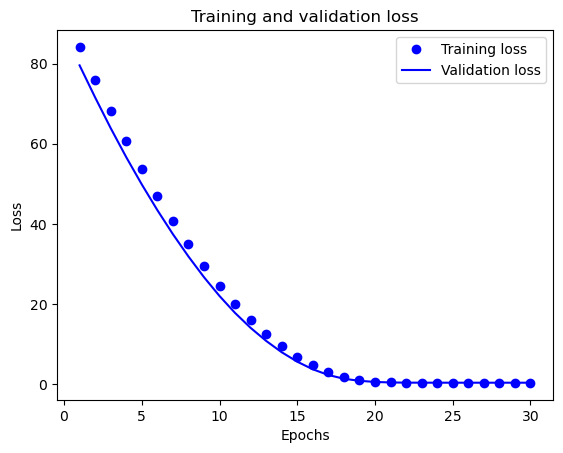

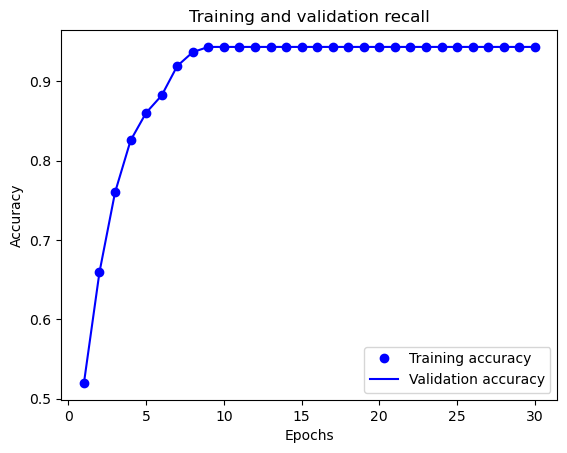

In [1091]:
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

SetF_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=keras.regularizers.l1(0.25)),
    keras.layers.Dense(30, activation="relu", kernel_regularizer=keras.regularizers.l1(0.25)),
    keras.layers.Dense(1, activation="sigmoid")
])
# root mean square error - regression - Classification use Recall/Precision
SetF_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                validation_split =0.2,
                callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)  


In [1092]:
XSetF_test_,XSetF_test_acc = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print("Accuracy", XSetF_test_acc)

8/8 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [965]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)


8/8 [==============================] - 0s 4ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

Epoch 1/30
15/15 [==============================] - 3s 63ms/step - loss: 81.7308 - accuracy: 0.1703 - val_loss: 77.0216 - val_accuracy: 0.3043
Epoch 2/30
15/15 [==============================] - 0s 10ms/step - loss: 73.4910 - accuracy: 0.3144 - val_loss: 69.0637 - val_accuracy: 0.4957
Epoch 3/30
15/15 [==============================] - 0s 7ms/step - loss: 65.7375 - accuracy: 0.4782 - val_loss: 61.5948 - val_accuracy: 0.6348
Epoch 4/30
15/15 [==============================] - 0s 8ms/step - loss: 58.4557 - accuracy: 0.6572 - val_loss: 54.5541 - val_accuracy: 0.7304
Epoch 5/30
15/15 [==============================] - 0s 7ms/step - loss: 51.5786 - accuracy: 0.7511 - val_loss: 47.9321 - val_accuracy: 0.7913
Epoch 6/30
15/15 [==============================] - 0s 7ms/step - loss: 45.1262 - accuracy: 0.8231 - val_loss: 41.7012 - val_accuracy: 0.7913
Epoch 7/30
15/15 [==============================] - 0s 8ms/step - loss: 39.0778 - accuracy: 0.8603 - val_loss: 35.9084 - val_accuracy: 0.8348
Epoc

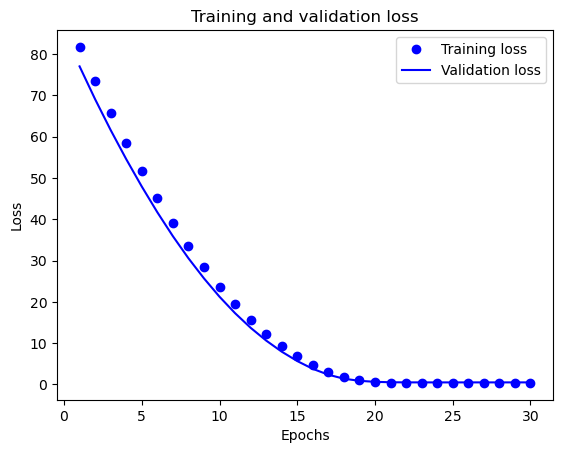

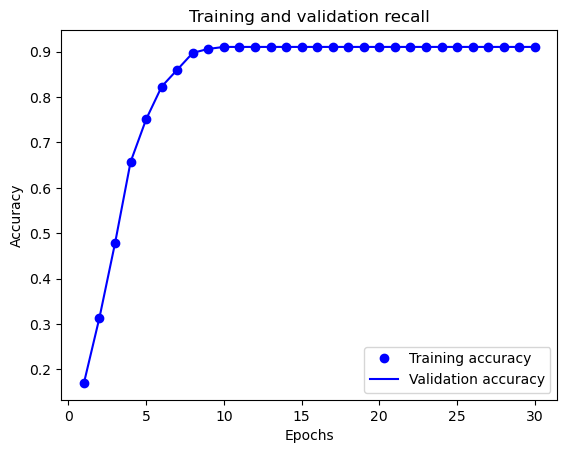

In [1106]:
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)

SetM_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=keras.regularizers.l1(0.25)),
    keras.layers.Dense(30, activation="relu", kernel_regularizer=keras.regularizers.l1(0.25)),
    keras.layers.Dense(1, activation="sigmoid")
])
# root mean square error - regression - Classification use Recall/Precision
SetM_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                validation_split =0.2,
                callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)  


In [1107]:
XSetM_test_loss,XSetM_test_acc = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print("Accuracy", XSetM_test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1108]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)
#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)


8/8 [==============================] - 0s 3ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LeakyReLU

### aveOralF

Epoch 1/30
15/15 [==============================] - 3s 59ms/step - loss: 0.3342 - accuracy: 0.9083 - val_loss: 0.2800 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 0s 13ms/step - loss: 0.2133 - accuracy: 0.9432 - val_loss: 0.2858 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1825 - accuracy: 0.9432 - val_loss: 0.3117 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1603 - accuracy: 0.9432 - val_loss: 0.2947 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 0.1389 - accuracy: 0.9541 - val_loss: 0.3269 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1196 - accuracy: 0.9476 - val_loss: 0.3230 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 15ms/step - loss: 0.1021 - accuracy: 0.9585 - val_loss: 0.4277 - val_accuracy: 0.9130
Epoch 8/30
15

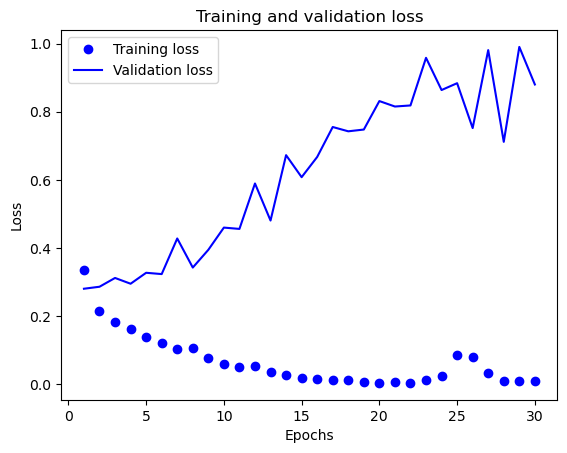

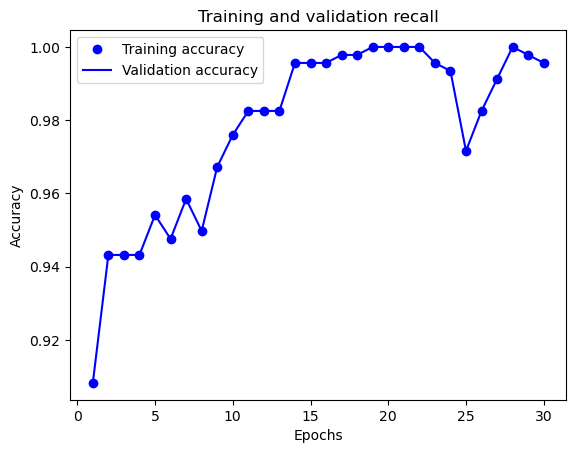

In [1188]:
tf.random.set_seed(42)
np.random.seed(42)

SetF_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1, activation = "sigmoid")
])
# Compile the model
# Define checkpoint callback
SetF_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2 ,
                    callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1189]:
XSetF_test_,XSetF_test_acc = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print("Accuracy", XSetF_test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [1190]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 4ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

Epoch 1/30
15/15 [==============================] - 3s 56ms/step - loss: 0.3079 - accuracy: 0.9389 - val_loss: 0.2783 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 0s 17ms/step - loss: 0.2066 - accuracy: 0.9432 - val_loss: 0.2648 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1717 - accuracy: 0.9432 - val_loss: 0.2979 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 13ms/step - loss: 0.1491 - accuracy: 0.9476 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 0.1268 - accuracy: 0.9541 - val_loss: 0.3300 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1180 - accuracy: 0.9520 - val_loss: 0.2967 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 11ms/step - loss: 0.0912 - accuracy: 0.9672 - val_loss: 0.3975 - val_accuracy: 0.9217
Epoch 8/30
15

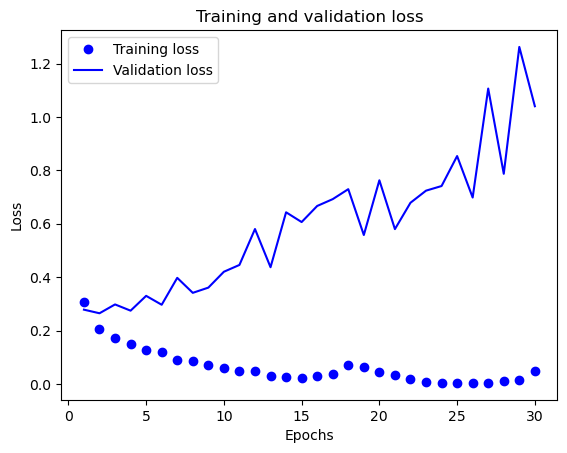

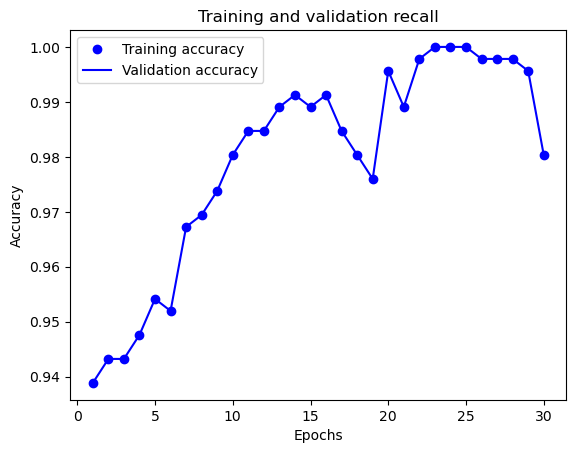

In [1191]:
tf.random.set_seed(42)
np.random.seed(42)

SetM_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1, activation = "sigmoid")
])
# Compile the model
# Define checkpoint callback
SetM_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#Train
history = SetM_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2 ,
                    callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1192]:
XM_test_,XM_test_acc = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print("Accuracy", XM_test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1193]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)


8/8 [==============================] - 0s 5ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PReLU

### aveOralF

In [1220]:
tf.random.set_seed(42)
np.random.seed(42)

SetF_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [1221]:
SetF_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 3s 58ms/step - loss: 0.6478 - accuracy: 0.6266 - val_loss: 0.4905 - val_accuracy: 0.8696
Epoch 2/30
15/15 [==============================] - 0s 16ms/step - loss: 0.3770 - accuracy: 0.9345 - val_loss: 0.3437 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 0s 14ms/step - loss: 0.2722 - accuracy: 0.9432 - val_loss: 0.3004 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 15ms/step - loss: 0.2465 - accuracy: 0.9432 - val_loss: 0.2900 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 0.2339 - accuracy: 0.9432 - val_loss: 0.2859 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 8ms/step - loss: 0.2249 - accuracy: 0.9432 - val_loss: 0.2869 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9432 - val_loss: 0.2911 - val_accuracy: 0.9217
Epoch 8/30
15/1

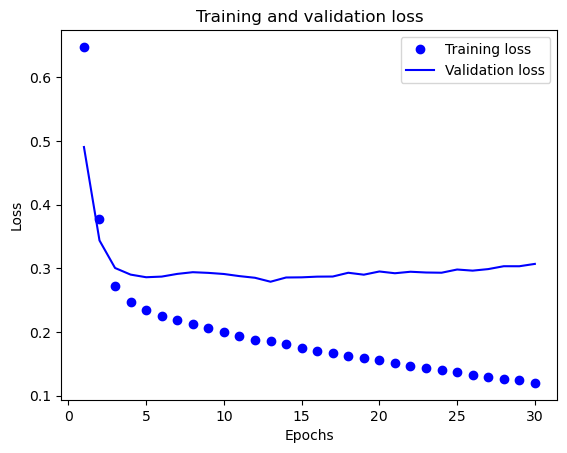

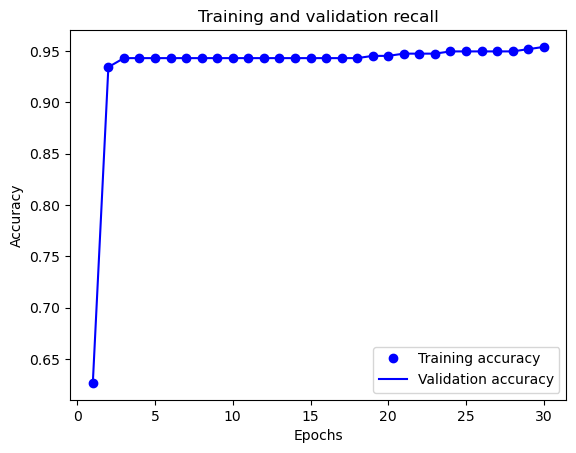

In [1222]:
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
rmse_test = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1224]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 1s 14ms/step - loss: 0.4775 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [1225]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 4ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

In [1226]:
tf.random.set_seed(42)
np.random.seed(42)

SetM_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [1227]:
SetM_model.compile(loss=keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Adam(learning_rate=1e-3), metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 3s 62ms/step - loss: 0.5618 - accuracy: 0.7598 - val_loss: 0.4612 - val_accuracy: 0.8261
Epoch 2/30
15/15 [==============================] - 0s 14ms/step - loss: 0.3900 - accuracy: 0.9105 - val_loss: 0.4397 - val_accuracy: 0.8522
Epoch 3/30
15/15 [==============================] - 0s 9ms/step - loss: 0.3521 - accuracy: 0.9105 - val_loss: 0.4459 - val_accuracy: 0.8522
Epoch 4/30
15/15 [==============================] - 0s 9ms/step - loss: 0.3323 - accuracy: 0.9105 - val_loss: 0.4525 - val_accuracy: 0.8522
Epoch 5/30
15/15 [==============================] - 0s 9ms/step - loss: 0.3197 - accuracy: 0.9105 - val_loss: 0.4527 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3098 - accuracy: 0.9105 - val_loss: 0.4522 - val_accuracy: 0.8522
Epoch 7/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3035 - accuracy: 0.9105 - val_loss: 0.4583 - val_accuracy: 0.8522
Epoch 8/30
15/15

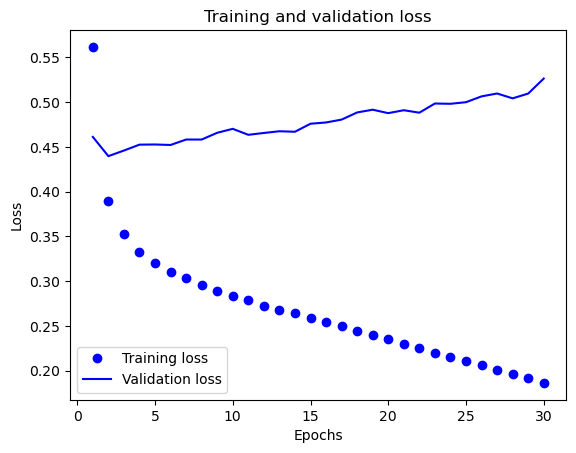

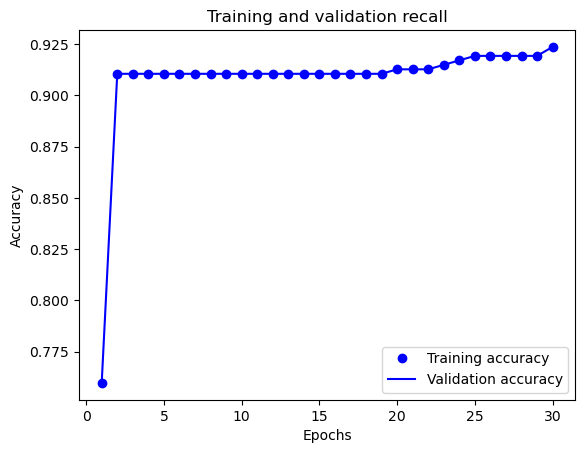

In [1228]:
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1229]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 40ms/step - loss: 0.4995 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1230]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)


8/8 [==============================] - 0s 6ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SELU

### aveOralF

In [1231]:
tf.random.set_seed(42)
np.random.seed(42)

In [1232]:
SetF_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
SetF_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    SetF_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
SetF_model.add(keras.layers.Dense(1,activation="sigmoid"))

In [1233]:
SetF_model.compile(loss=keras.losses.BinaryCrossentropy() , 
                   optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                   metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 23s 399ms/step - loss: 0.4260 - accuracy: 0.7948 - val_loss: 0.2945 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 3s 186ms/step - loss: 0.2332 - accuracy: 0.9432 - val_loss: 0.4756 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 3s 182ms/step - loss: 0.3175 - accuracy: 0.9258 - val_loss: 0.3183 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 4s 257ms/step - loss: 0.2322 - accuracy: 0.9432 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 3s 181ms/step - loss: 0.2493 - accuracy: 0.9432 - val_loss: 0.2865 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 3s 186ms/step - loss: 0.2545 - accuracy: 0.9432 - val_loss: 0.2981 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 2s 147ms/step - loss: 0.2257 - accuracy: 0.9432 - val_loss: 0.3378 - val_accuracy: 0.9217
Epoch

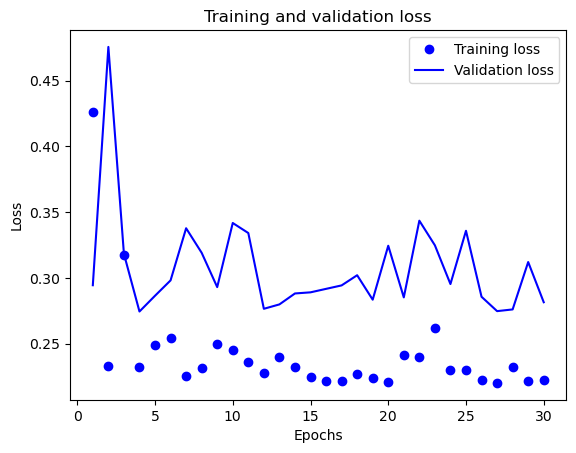

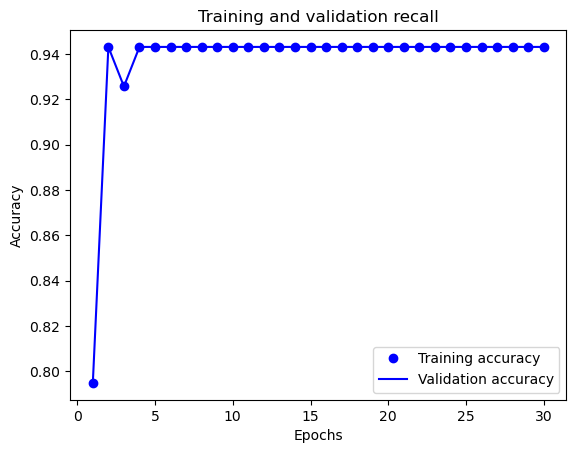

In [1234]:
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = aveOralF_model.evaluate(X_test_scaled,y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1235]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 3s 57ms/step - loss: 0.2749 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [1236]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 3s 50ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

In [1237]:
tf.random.set_seed(42)
np.random.seed(42)

In [1238]:
SetM_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
SetM_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    SetM_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
SetM_model.add(keras.layers.Dense(1,activation="sigmoid"))

In [1239]:
SetM_model.compile(loss=keras.losses.BinaryCrossentropy() , 
                   optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                   metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 31s 346ms/step - loss: 0.4158 - accuracy: 0.8581 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 2/30
15/15 [==============================] - 2s 166ms/step - loss: 0.3185 - accuracy: 0.9105 - val_loss: 0.5858 - val_accuracy: 0.8522
Epoch 3/30
15/15 [==============================] - 4s 242ms/step - loss: 0.3359 - accuracy: 0.9105 - val_loss: 0.4215 - val_accuracy: 0.8522
Epoch 4/30
15/15 [==============================] - 3s 168ms/step - loss: 0.3164 - accuracy: 0.9105 - val_loss: 0.4600 - val_accuracy: 0.8522
Epoch 5/30
15/15 [==============================] - 3s 174ms/step - loss: 0.3283 - accuracy: 0.9105 - val_loss: 0.4661 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 2s 147ms/step - loss: 0.3147 - accuracy: 0.9105 - val_loss: 0.4705 - val_accuracy: 0.8522
Epoch 7/30
15/15 [==============================] - 2s 139ms/step - loss: 0.3247 - accuracy: 0.9105 - val_loss: 0.4862 - val_accuracy: 0.8522
Epoch

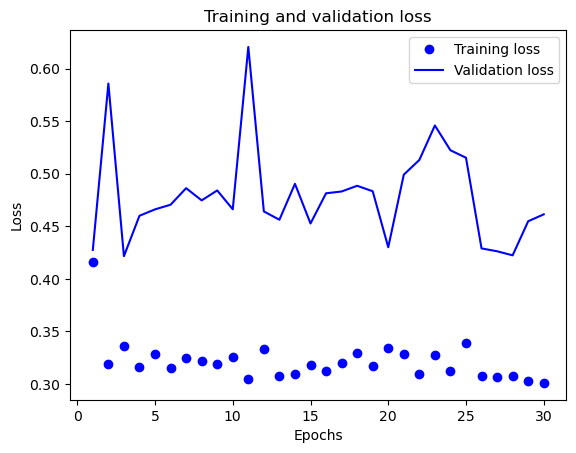

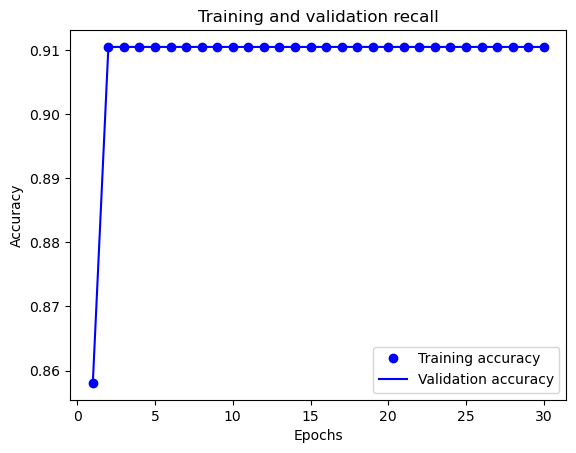

In [1240]:
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = aveOralM_model.evaluate(X_test_scaled,y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1241]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 3s 54ms/step - loss: 0.4148 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1242]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 3s 51ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RELU

### aveOralF

In [1247]:
tf.random.set_seed(42)
np.random.seed(42)

In [1248]:
SetF_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
SetF_model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    SetF_model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
SetF_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [1249]:
SetF_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 32s 449ms/step - loss: 0.4621 - accuracy: 0.8821 - val_loss: 0.3650 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 3s 182ms/step - loss: 0.2847 - accuracy: 0.9432 - val_loss: 0.5373 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 4s 247ms/step - loss: 0.2747 - accuracy: 0.9432 - val_loss: 0.2858 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 4s 259ms/step - loss: 0.2242 - accuracy: 0.9432 - val_loss: 0.2737 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 3s 190ms/step - loss: 0.1958 - accuracy: 0.9432 - val_loss: 0.2904 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 3s 178ms/step - loss: 0.1777 - accuracy: 0.9432 - val_loss: 0.5244 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 2s 159ms/step - loss: 0.1573 - accuracy: 0.9432 - val_loss: 0.4235 - val_accuracy: 0.9217
Epoch

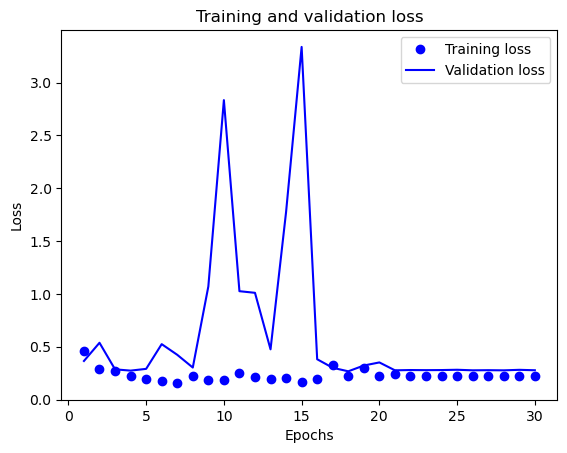

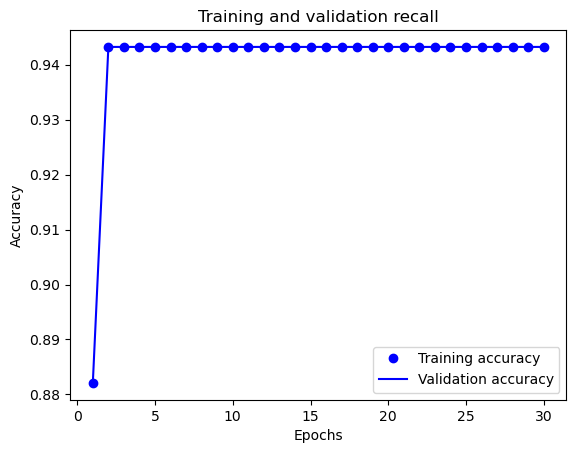

In [1250]:
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1251]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 1s 55ms/step - loss: 0.2516 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [1252]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 2s 68ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

In [1253]:
tf.random.set_seed(42)
np.random.seed(42)

In [1254]:
SetM_model = keras.models.Sequential()
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
SetM_model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    SetM_model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
SetM_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [1255]:
SetM_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

Epoch 1/30
15/15 [==============================] - 25s 472ms/step - loss: 0.9001 - accuracy: 0.9105 - val_loss: 0.6232 - val_accuracy: 0.8522
Epoch 2/30
15/15 [==============================] - 4s 248ms/step - loss: 0.5012 - accuracy: 0.8996 - val_loss: 0.4968 - val_accuracy: 0.8522
Epoch 3/30
15/15 [==============================] - 3s 237ms/step - loss: 0.3120 - accuracy: 0.9105 - val_loss: 0.4325 - val_accuracy: 0.8522
Epoch 4/30
15/15 [==============================] - 2s 164ms/step - loss: 0.3126 - accuracy: 0.9105 - val_loss: 0.4915 - val_accuracy: 0.8522
Epoch 5/30
15/15 [==============================] - 3s 168ms/step - loss: 0.3102 - accuracy: 0.9105 - val_loss: 0.4584 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 3s 168ms/step - loss: 0.3087 - accuracy: 0.9105 - val_loss: 0.4758 - val_accuracy: 0.8522
Epoch 7/30
15/15 [==============================] - 3s 169ms/step - loss: 0.2602 - accuracy: 0.9105 - val_loss: 1.1058 - val_accuracy: 0.8522
Epoch

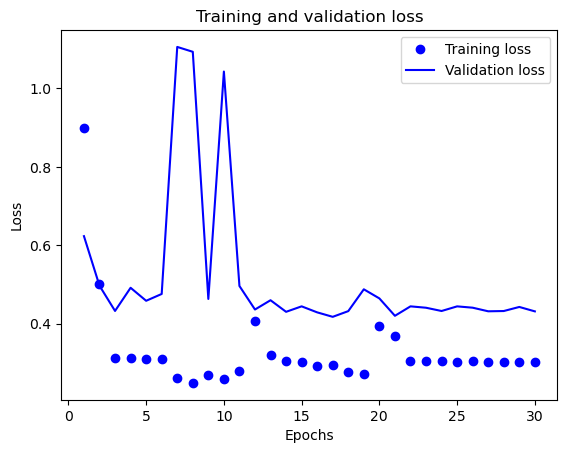

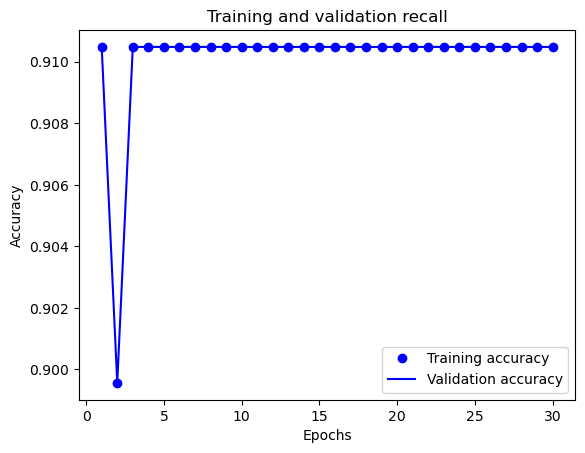

In [1256]:
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1257]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 1s 66ms/step - loss: 0.4052 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1258]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 3s 52ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Max norm regularization

### aveOralF

In [1285]:
tf.random.set_seed(42)
np.random.seed(42)
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

Epoch 1/30
15/15 [==============================] - 19s 1s/step - loss: 0.6446 - accuracy: 0.6834 - val_loss: 0.5547 - val_accuracy: 0.7913
Epoch 2/30
15/15 [==============================] - 0s 14ms/step - loss: 0.3536 - accuracy: 0.8865 - val_loss: 0.3626 - val_accuracy: 0.9043
Epoch 3/30
15/15 [==============================] - 0s 11ms/step - loss: 0.2576 - accuracy: 0.9367 - val_loss: 0.3193 - val_accuracy: 0.9130
Epoch 4/30
15/15 [==============================] - 0s 12ms/step - loss: 0.2321 - accuracy: 0.9389 - val_loss: 0.3001 - val_accuracy: 0.9043
Epoch 5/30
15/15 [==============================] - 0s 9ms/step - loss: 0.2190 - accuracy: 0.9345 - val_loss: 0.4105 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 9ms/step - loss: 0.2123 - accuracy: 0.9432 - val_loss: 0.4481 - val_accuracy: 0.8870
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 0.1948 - accuracy: 0.9432 - val_loss: 0.4238 - val_accuracy: 0.9130
Epoch 8/30
15/15 

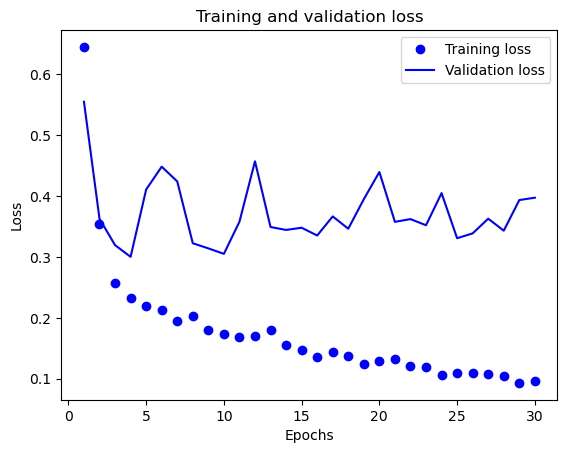

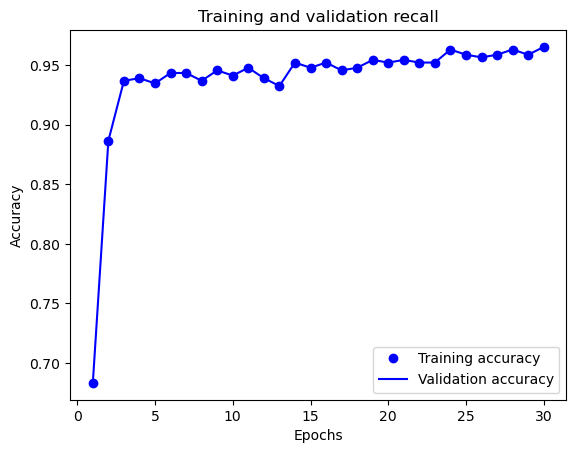

In [1286]:
from functools import partial

# We limit the weights in a layer, by imposing a constraint on the L2 norm of vectors of weights to be under
# a threshold, here 1. This diminish the flexibility of the network, so helps preventing overfitting 

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

SetF_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(1, activation="sigmoid")
])
SetF_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=n_epochs,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetF_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1287]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled,y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.8941
Accuracy 0.8941176533699036


In [1288]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 2ms/step
Evaluation Scores:
F1 Score:  0.12903225806451613
Accuracy:  0.8941176470588236
Precision:  0.18181818181818182
Recall  0.1


### aveOralM

In [1299]:
tf.random.set_seed(42)
np.random.seed(42)
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

Epoch 1/30
15/15 [==============================] - 2s 32ms/step - loss: 0.6229 - accuracy: 0.6747 - val_loss: 0.5660 - val_accuracy: 0.7826
Epoch 2/30
15/15 [==============================] - 0s 11ms/step - loss: 0.3909 - accuracy: 0.8799 - val_loss: 0.4946 - val_accuracy: 0.8261
Epoch 3/30
15/15 [==============================] - 0s 7ms/step - loss: 0.3288 - accuracy: 0.9061 - val_loss: 0.5331 - val_accuracy: 0.8435
Epoch 4/30
15/15 [==============================] - 0s 7ms/step - loss: 0.2914 - accuracy: 0.9083 - val_loss: 0.5569 - val_accuracy: 0.8174
Epoch 5/30
15/15 [==============================] - 0s 7ms/step - loss: 0.2789 - accuracy: 0.9127 - val_loss: 0.6868 - val_accuracy: 0.7391
Epoch 6/30
15/15 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.9039 - val_loss: 0.5953 - val_accuracy: 0.8174
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 0.2524 - accuracy: 0.9105 - val_loss: 0.6366 - val_accuracy: 0.8000
Epoch 8/30
15/15 [

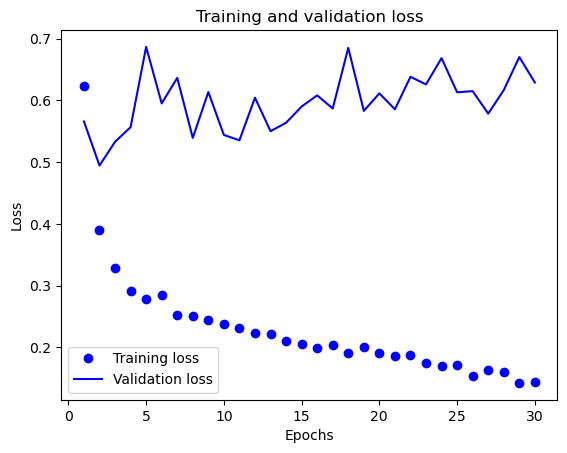

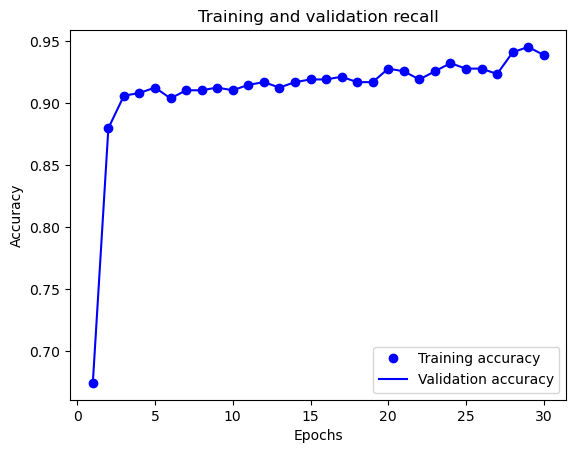

In [1300]:
from functools import partial

# We limit the weights in a layer, by imposing a constraint on the L2 norm of vectors of weights to be under
# a threshold, here 1. This diminish the flexibility of the network, so helps preventing overfitting 

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

SetM_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(1, activation="sigmoid")
])
SetM_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=n_epochs,
                    validation_split =0.2,
                   callbacks=[checkpoint_cb])
SetM_model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1301]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled,y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.8510
Accuracy 0.8509804010391235


In [1302]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 2ms/step
Evaluation Scores:
F1 Score:  0.049999999999999996
Accuracy:  0.8509803921568627
Precision:  0.2
Recall  0.02857142857142857


## Drop Regularization

### aveOralF

In [1315]:
tf.random.set_seed(42)
np.random.seed(42)

Epoch 1/30
15/15 [==============================] - 2s 35ms/step - loss: 0.3010 - accuracy: 0.9148 - val_loss: 0.3191 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 0s 12ms/step - loss: 0.2363 - accuracy: 0.9432 - val_loss: 0.2861 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 0s 17ms/step - loss: 0.2021 - accuracy: 0.9432 - val_loss: 0.2835 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1861 - accuracy: 0.9432 - val_loss: 0.2838 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 0s 12ms/step - loss: 0.1676 - accuracy: 0.9432 - val_loss: 0.2869 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 0.1551 - accuracy: 0.9432 - val_loss: 0.3044 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 11ms/step - loss: 0.1439 - accuracy: 0.9432 - val_loss: 0.3016 - val_accuracy: 0.9217
Epoch 8/30
15

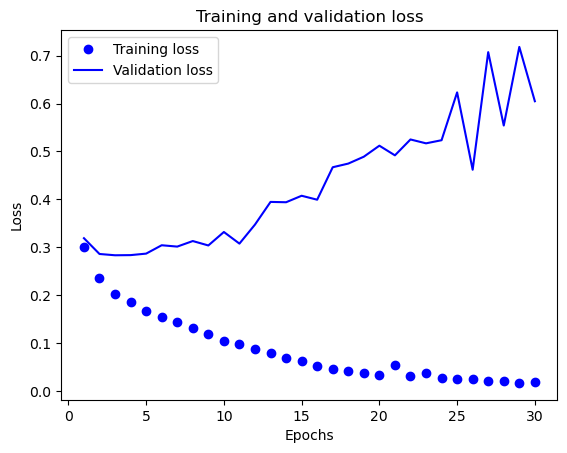

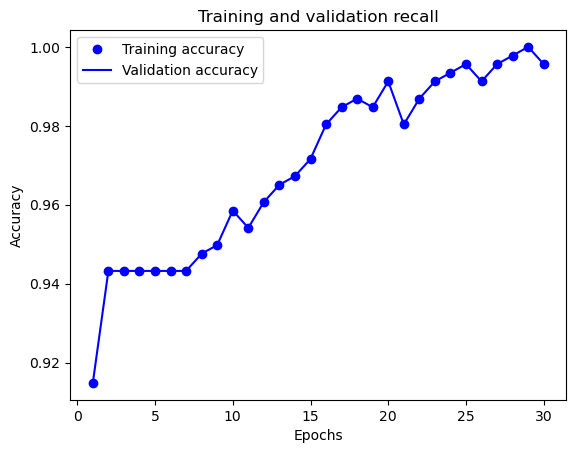

In [1316]:
SetF_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(1, activation="sigmoid")
])
SetF_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=n_epochs,
                    validation_split =0.2,
                    callbacks=[checkpoint_cb])
mse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1317]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 2ms/step - loss: 1.1334 - accuracy: 0.8980
Accuracy 0.8980392217636108


In [1318]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 3ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8980392156862745
Precision:  0.0
Recall  0.0


### aveOralM

In [1311]:
tf.random.set_seed(42)
np.random.seed(42)

Epoch 1/30
15/15 [==============================] - 2s 49ms/step - loss: 0.3982 - accuracy: 0.8646 - val_loss: 0.5463 - val_accuracy: 0.8522
Epoch 2/30
15/15 [==============================] - 0s 13ms/step - loss: 0.3059 - accuracy: 0.9105 - val_loss: 0.4492 - val_accuracy: 0.8522
Epoch 3/30
15/15 [==============================] - 0s 9ms/step - loss: 0.2796 - accuracy: 0.9105 - val_loss: 0.4856 - val_accuracy: 0.8522
Epoch 4/30
15/15 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.9105 - val_loss: 0.4860 - val_accuracy: 0.8522
Epoch 5/30
15/15 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.9105 - val_loss: 0.4938 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 0s 12ms/step - loss: 0.2277 - accuracy: 0.9127 - val_loss: 0.5018 - val_accuracy: 0.8522
Epoch 7/30
15/15 [==============================] - 0s 8ms/step - loss: 0.2199 - accuracy: 0.9170 - val_loss: 0.5069 - val_accuracy: 0.8522
Epoch 8/30
15/15 

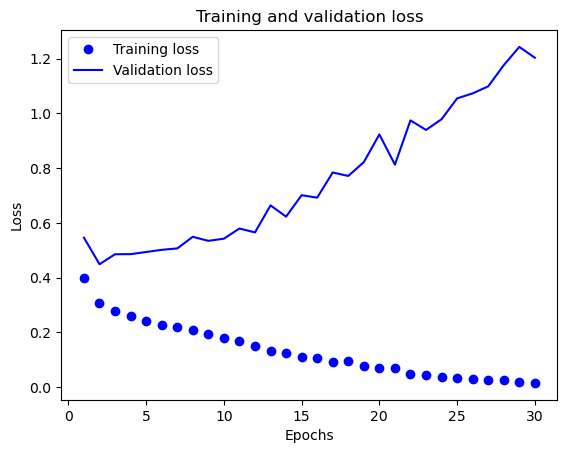

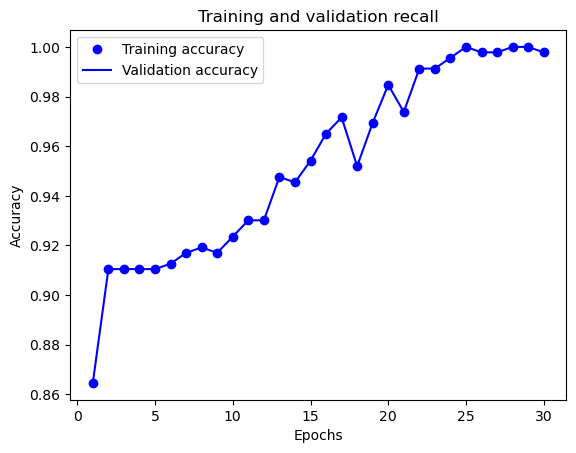

In [1312]:
SetM_model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.01),
    keras.layers.Dense(1, activation="sigmoid")
])
SetM_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

n_epochs = 30
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=n_epochs,
                    validation_split =0.2,
                    callbacks=[checkpoint_cb])
mse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1313]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 1.8480 - accuracy: 0.8353
Accuracy 0.8352941274642944


In [1314]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 3ms/step
Evaluation Scores:
F1 Score:  0.04545454545454545
Accuracy:  0.8352941176470589
Precision:  0.1111111111111111
Recall  0.02857142857142857


## Batch Normalization

### aveOralF

In [1342]:
SetF_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [1343]:
SetF_model.summary()

Model: "sequential_360"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 46)                0         
                                                                 
 batch_normalization_21 (Bat  (None, 46)               184       
 chNormalization)                                                
                                                                 
 dense_4475 (Dense)          (None, 300)               14100     
                                                                 
 batch_normalization_22 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_4476 (Dense)          (None, 100)               30100     
                                                                 
 batch_normalization_23 (Bat  (None, 100)           

In [1344]:
SetF_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
              metrics="accuracy")

Epoch 1/30
15/15 [==============================] - 18s 36ms/step - loss: 0.7435 - accuracy: 0.5611 - val_loss: 0.6112 - val_accuracy: 0.8087
Epoch 2/30
15/15 [==============================] - 0s 8ms/step - loss: 0.6180 - accuracy: 0.6725 - val_loss: 0.5592 - val_accuracy: 0.8870
Epoch 3/30
15/15 [==============================] - 0s 9ms/step - loss: 0.5328 - accuracy: 0.7860 - val_loss: 0.5017 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 9ms/step - loss: 0.4563 - accuracy: 0.8515 - val_loss: 0.4508 - val_accuracy: 0.8957
Epoch 5/30
15/15 [==============================] - 0s 8ms/step - loss: 0.4014 - accuracy: 0.8930 - val_loss: 0.4057 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 8ms/step - loss: 0.3380 - accuracy: 0.9454 - val_loss: 0.4115 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 8ms/step - loss: 0.2962 - accuracy: 0.9563 - val_loss: 0.4080 - val_accuracy: 0.9130
Epoch 8/30
15/15 [

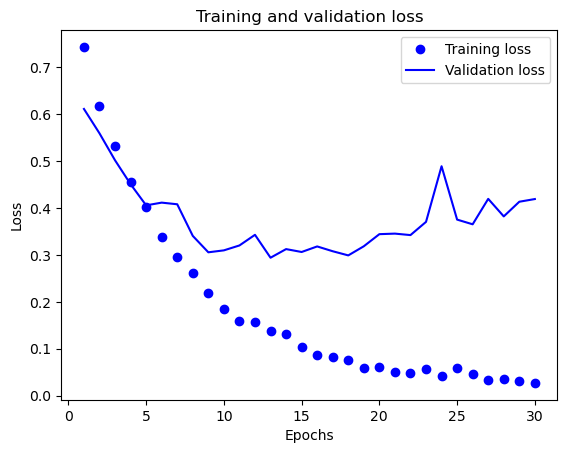

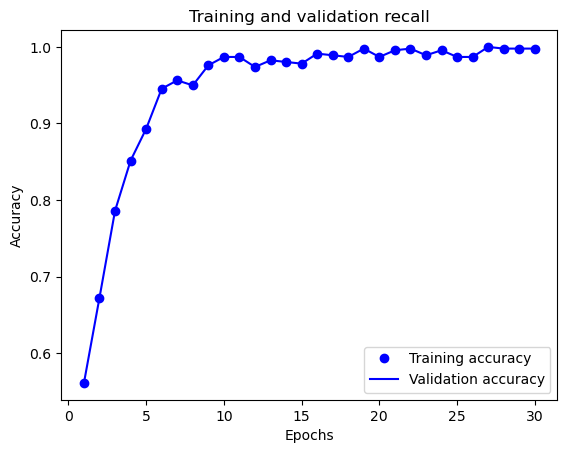

In [1345]:
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2)
mse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print()

# Plot the learning curves
plot_history_classification(history)


In [1346]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.9098
Accuracy 0.9098039269447327


In [1347]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 3ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9098039215686274
Precision:  0.0
Recall  0.0


### aveOralM

In [1349]:
SetM_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [1350]:
SetM_model.summary()

Model: "sequential_362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 46)                0         
                                                                 
 batch_normalization_27 (Bat  (None, 46)               184       
 chNormalization)                                                
                                                                 
 dense_4481 (Dense)          (None, 300)               14100     
                                                                 
 batch_normalization_28 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_4482 (Dense)          (None, 100)               30100     
                                                                 
 batch_normalization_29 (Bat  (None, 100)           

In [1351]:
SetM_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
              metrics="accuracy")

Epoch 1/30
15/15 [==============================] - 6s 54ms/step - loss: 0.7846 - accuracy: 0.4978 - val_loss: 0.5833 - val_accuracy: 0.8087
Epoch 2/30
15/15 [==============================] - 0s 13ms/step - loss: 0.6262 - accuracy: 0.6288 - val_loss: 0.5709 - val_accuracy: 0.8261
Epoch 3/30
15/15 [==============================] - 0s 9ms/step - loss: 0.5265 - accuracy: 0.7707 - val_loss: 0.5215 - val_accuracy: 0.8435
Epoch 4/30
15/15 [==============================] - 0s 10ms/step - loss: 0.4673 - accuracy: 0.8406 - val_loss: 0.5112 - val_accuracy: 0.8435
Epoch 5/30
15/15 [==============================] - 0s 9ms/step - loss: 0.3971 - accuracy: 0.9105 - val_loss: 0.4785 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3469 - accuracy: 0.9323 - val_loss: 0.4762 - val_accuracy: 0.8348
Epoch 7/30
15/15 [==============================] - 0s 9ms/step - loss: 0.3070 - accuracy: 0.9301 - val_loss: 0.4584 - val_accuracy: 0.8522
Epoch 8/30
15/15

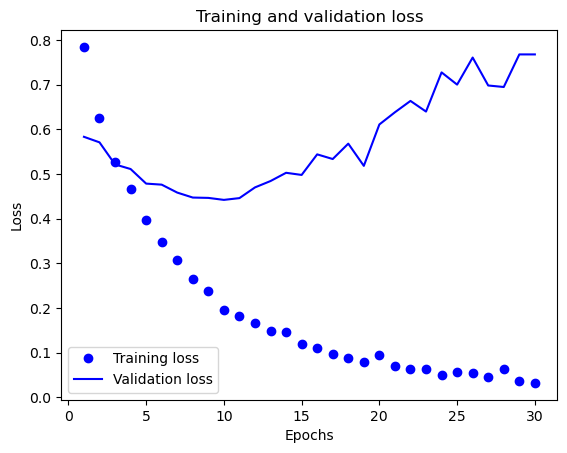

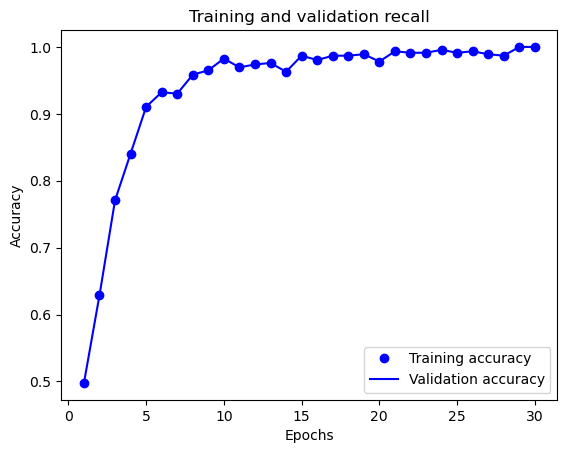

In [1352]:
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                    validation_split =0.2)
mse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print()

# Plot the learning curves
plot_history_classification(history)

In [1353]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.8254 - accuracy: 0.8549
Accuracy 0.8549019694328308


In [1354]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetM_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 6ms/step
Evaluation Scores:
F1 Score:  0.05128205128205128
Accuracy:  0.8549019607843137
Precision:  0.25
Recall  0.02857142857142857


## Functional API

### aveOralF

In [1372]:
np.random.seed(42)
tf.random.set_seed(42)

In [1373]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
SetF_model = keras.models.Model(inputs=[input_], outputs=[output])

In [1374]:
SetF_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_4493 (Dense)             (None, 300)          14100       ['input_6[0][0]']                
                                                                                                  
 dense_4494 (Dense)             (None, 300)          90300       ['dense_4493[0][0]']             
                                                                                                  
 concatenate_5 (Concatenate)    (None, 346)          0           ['input_6[0][0]',                
                                                                  'dense_4494[0][0]']       

Epoch 1/30
15/15 [==============================] - 2s 46ms/step - loss: 0.9603 - accuracy: 0.9105 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 2/30
15/15 [==============================] - 0s 10ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 3/30
15/15 [==============================] - 0s 8ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 4/30
15/15 [==============================] - 0s 8ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 5/30
15/15 [==============================] - 0s 7ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 6/30
15/15 [==============================] - 0s 7ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 0.8757 - accuracy: 0.9432 - val_loss: 1.2072 - val_accuracy: 0.9217
Epoch 8/30
15/15 [

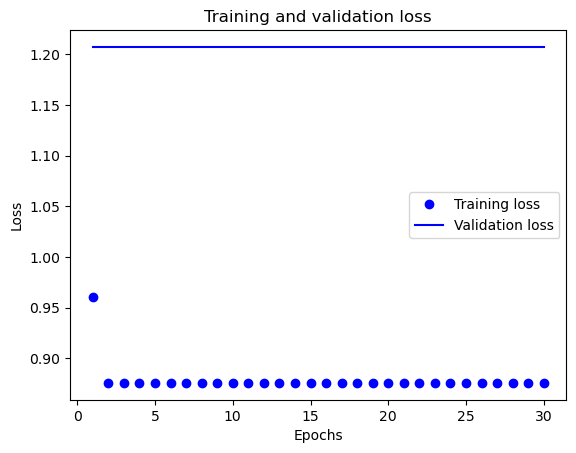

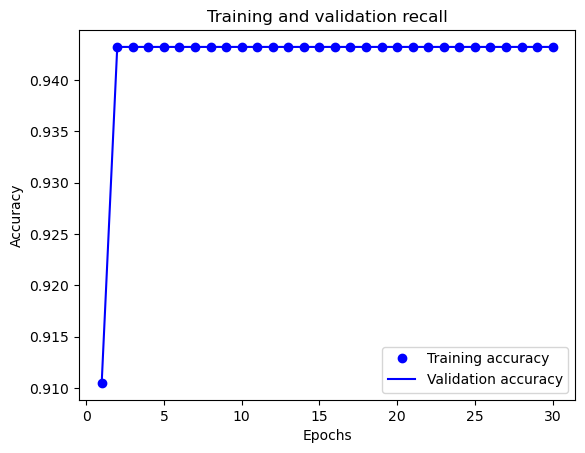

In [1375]:
SetF_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
history = SetF_model.fit(X_train_scaled, y_SetF_train, epochs=30,
                    validation_split =0.2)
mse_test = SetF_model.evaluate(X_test_scaled, y_SetF_test)

# Plot the learning curves
plot_history_classification(history)

In [1376]:
test_loss,test_acc = SetF_model.evaluate(X_test_scaled, y_SetF_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 3ms/step - loss: 1.2098 - accuracy: 0.9216
Accuracy 0.9215686321258545


In [1377]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetF_test,y_pred_binary)
accuracy = accuracy_score(y_SetF_test, y_pred_binary)
precision = precision_score(y_SetF_test,y_pred_binary)
recall = recall_score(y_SetF_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 3ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.9215686274509803
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### aveOralM

In [1378]:
np.random.seed(42)
tf.random.set_seed(42)

In [1379]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
SetM_model = keras.models.Model(inputs=[input_], outputs=[output])

In [1380]:
SetM_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_4496 (Dense)             (None, 300)          14100       ['input_7[0][0]']                
                                                                                                  
 dense_4497 (Dense)             (None, 300)          90300       ['dense_4496[0][0]']             
                                                                                                  
 concatenate_6 (Concatenate)    (None, 346)          0           ['input_7[0][0]',                
                                                                  'dense_4497[0][0]']       

Epoch 1/30
15/15 [==============================] - 2s 36ms/step - loss: 1.3816 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 2/30
15/15 [==============================] - 0s 10ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 3/30
15/15 [==============================] - 0s 7ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 4/30
15/15 [==============================] - 0s 7ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 5/30
15/15 [==============================] - 0s 7ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 6/30
15/15 [==============================] - 0s 8ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 1.3808 - accuracy: 0.9105 - val_loss: 2.2802 - val_accuracy: 0.8522
Epoch 8/30
15/15 [

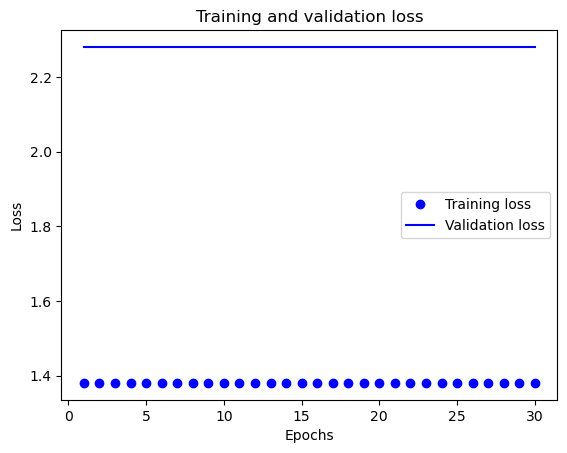

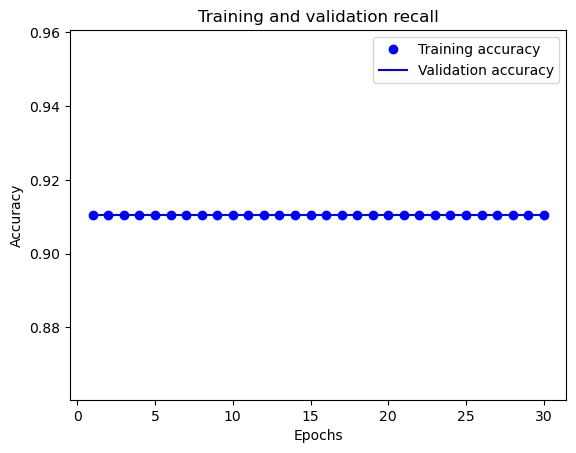

In [1381]:
SetM_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics="accuracy")
history = SetM_model.fit(X_train_scaled, y_SetM_train, epochs=30,
                    validation_split =0.2)
mse_test = SetM_model.evaluate(X_test_scaled, y_SetM_test)

# Plot the learning curves
plot_history_classification(history)

In [1382]:
test_loss,test_acc = SetM_model.evaluate(X_test_scaled, y_SetM_test)
print("Accuracy", test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 2.1171 - accuracy: 0.8627
Accuracy 0.8627451062202454


In [1383]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
y_pred = SetF_model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

#Calulate metrics
f1 = f1_score(y_SetM_test,y_pred_binary)
accuracy = accuracy_score(y_SetM_test, y_pred_binary)
precision = precision_score(y_SetM_test,y_pred_binary)
recall = recall_score(y_SetM_test, y_pred_binary)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)

8/8 [==============================] - 0s 2ms/step
Evaluation Scores:
F1 Score:  0.0
Accuracy:  0.8627450980392157
Precision:  0.0
Recall  0.0


C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation

## Regression

### aveOralF Results
Regression MLP:
* RMSE - 0.3980003595352173,

Elastic net:
* RMSE - 0.2340493725743007

Ridge Regression:
* RMSE - 0.23755306021454384

Lasso Regression:
* RMSE - 0.23513312993218105

Early Stopping:
* RMSE - 14637645849935.283

Linear Regression:
* RMSE - 0.2392637681509358

### aveOralM Results

Regression MLP:
* RMSE - 0.30010876059532166

Elastic net:
* RMSE - 0.2269915587124626

Ridge Regression:
* RMSE - 0.22773835274613607

Lasso Regression:
* RMSE - 0.22810331592216396

Early Stopping:
* RMSE - 20411146058816.08

Linear Regression:
* RMSE - 0.23248233661565443

I used RMSE to measure how good my results were (the lower the number/closer to 0 the better) For these results aveOralM beat most of the aveOralF RMSE resutls except Early stopping the best regression for aveOralF is Elastic net with a value of  0.2340493725743007 and the worst regression was Early stopping with a value of 14637645849935.283 RMSE. Elastic net was also the best for aveOralM with a value of 0.2269915587124626 and the worst was Early stopping with a value of 20411146058816.08.

## Regression Model(Neural Networks) Results

### aveOralF Results
L1 Regularization
* RMSE - 0.4047209918498993

Leaky ReLU
* RMSE - 0.3760608434677124

PReLU
* RMSE - 0.3802614212036133

SELU
* RMSE - 0.3473476767539978

RELU
* RMSE - 0.41129255294799805

Max norm regularization
* RMSE - 0.31252944469451904

Drop Regularization
* RMSE - 0.43402132391929626

Random Forest
* RMSE - -0.24118266681367848

Batch Normalization
* RMSE - 0.5842152237892151

Functional API
* RMSE - 0.4140692353248596

### aveOralM

L1 Regularization
* RMSE - 0.35423365235328674

Leaky ReLu
* RMSE - 0.3422413468360901

PreLU
* RMSE - 0.35105767846107483

SELU
* RMSE - 0.4588989317417145

RELU
* RMSE - 0.3300146460533142

Max norm regularization
* RMSE - 0.2723824977874756

Drop regularization
* RMSE - 0.4162690043449402

Random Forest
* RMSE - -0.25795384059179455

Batch Normalization
* RMSE - 0.5535053014755249

Functional API
* RMSE - 0.3125641345977783

For these models most of the aveOralM models also beat the aveOralF, RELU aveOralF was the only one that managed to beat aveOralM. The best model for aveOralF was Random Forest with a value of RMSE -0.24118266681367848 (I'm not sure this was a negative result) and the worst module was Batch Normalization with a result of  0.5842152237892151 RMSE. The best averalM result was also Random Forest of value -0.25795384059179455 (again not sure why it's negative) and the worst was again Batch Normalization with a value of 0.5535053014755249

# Regression Conclusion
Overall I was happy with my Regression results and the models that I built, most of the RMSE results were pretty good. These modules of course could also have been improved had I used e.g. different hyperparameters values, epoch, more layers etc.

# Evaluation

## Classification

### aveOralF Results:

### aveOralM Results:

I unfortunately used Accuracy to measure how good my modules were (I'll elaborate more in the conclusion), the best models for aveOralF was L1 Regularization, Leaky ReLU,PReLU,SELU and Functinal API with a result of 0.9215686274509803 and the worst result was Max norm regularization with a result of  0.8941176470588236. For averalM the best result was L1 Regularization,Leaky ReLU, PReLU, SELU, RELU, Functional API with a result of 0.8627450980392157 and the worst result was Drop regularization with a result of 0.8352941176470589. If this was done with other metrics the results would be as followed for F1 the best result of aveOralF is max norm regularization with a result of 0.12903225806451613 and for aveOralM it's Batch normalization with a result of 0.05128205128205128. For Precison of aveOralF the best result is max norm regularization with a result of 0.18181818181818182 and for aveOralM it's also batch normalization with a result of 0.25. Lastly for Recall the best result for aveOralF is max normalization with a result of 0.1 and for aveOralF it is max normalization, drop regularization and batch normalization with a value of 0.02857142857142857.

# Classification Conclusion

I unfortunately had to use accuracy as a metric as for when I tried use precison or recall most of my epoch values were "0.0000e+00" and therefore it wasn't giving me a result, I tried to reduce the number of epochs but this didn't work for all the modules. Now the reasons for this could be if my dataset is highly imbalanced, my models could be too simple, the training duration, incorrect processing or my hyperparameters experimentation wasn't good enough and for the results that I did get for some modules Recall,F1 and precision were extremely low which I wasn't happy with I am however proud of the way I structured my models I think I had the right idea but just wasn't able to excuse it, I know accuracy isn't the best metric for Classification but it's just what I was able to do.